In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read the test set

In [2]:
df_test = pd.read_csv('../data/X_test.csv')[:100000]
df_test.head()

,npval_50971,nptime_50971,npval_50983,nptime_50983,npval_50902,nptime_50902,npval_51221,nptime_51221,npval_50912,nptime_50912,...,nptime_last_51104,npval_last_51078,nptime_last_51078,npval_last_50884,nptime_last_50884,npval_last_51255,nptime_last_51255,first_race,chartyear,hadm_id
0,4.3,18.0,137.0,18.0,102.0,18.0,38.4,18.0,1.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,2190,20000057
1,3.3,16.0,141.0,16.0,103.0,16.0,38.2,16.0,1.1,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,2190,20000057
2,3.4,17.0,145.0,17.0,103.0,17.0,39.0,17.0,1.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,2190,20000057
3,4.0,12.0,138.0,12.0,103.0,12.0,37.8,12.0,0.8,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,2193,20000293
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black,2183,20000298


In [3]:
lab_columns = [col for col in df_test.columns if 'npval_' in col and 'last_' not in col]
# Check the most popular labs (values with non-missing values)
most_popular_labs = {lab_id.replace('npval_', ''): df_test[lab_id].notna().sum() for lab_id in lab_columns}
# Sort the labs by the number of non-missing values
most_popular_labs = dict(sorted(most_popular_labs.items(), key=lambda item: item[1], reverse=True))

In [4]:
most_popular_labs

{'50912': 90094,
 '51221': 90090,
 '50971': 90080,
 '50983': 89609,
 '51006': 89591,
 '50902': 89533,
 '50882': 88765,
 '50868': 88688,
 '51265': 88568,
 '51222': 88407,
 '51301': 88333,
 '51249': 88283,
 '51279': 88278,
 '51250': 88278,
 '51248': 88275,
 '51277': 88207,
 '50931': 87980,
 '50960': 80787,
 '50893': 77103,
 '50970': 77055,
 '51274': 44232,
 '51237': 44231,
 '52172': 41598,
 '51275': 40638,
 '51678': 34060,
 '50934': 31109,
 '50878': 27755,
 '50861': 27591,
 '50885': 27058,
 '50863': 26990,
 '50947': 24558,
 '51244': 16931,
 '51256': 16741,
 '51254': 16404,
 '50862': 14337,
 '50954': 14137,
 '51200': 12998,
 '51146': 12085,
 '51491': 10556,
 '51498': 10371,
 '50820': 10247,
 '50813': 9743,
 '50821': 8964,
 '50804': 8960,
 '50818': 8959,
 '52075': 7674,
 '51133': 7665,
 '52074': 7515,
 '50910': 7009,
 '50911': 6173,
 '50808': 5938,
 '52073': 5701,
 '52069': 5605,
 '51516': 5571,
 '52135': 5417,
 '51493': 5329,
 '51009': 4929,
 '50802': 4487,
 '51003': 4443,
 '51492': 4098,

In [5]:
# Get the lab names for the most popular labs
labs = pd.read_csv('../data/d_labitems.csv')

most_popular_labs = {labs[labs.itemid == int(lab_id)]['label'].values[0]: count for lab_id, count in most_popular_labs.items()} 
most_popular_labs

{'Creatinine': 90094,
 'Hematocrit': 90090,
 'Potassium': 90080,
 'Sodium': 89609,
 'Urea Nitrogen': 89591,
 'Chloride': 89533,
 'Bicarbonate': 88765,
 'Anion Gap': 88688,
 'Platelet Count': 88568,
 'Hemoglobin': 2033,
 'White Blood Cells': 88333,
 'MCHC': 88283,
 'Red Blood Cells': 88278,
 'MCV': 88278,
 'MCH': 88275,
 'RDW': 88207,
 'Glucose': 3277,
 'Magnesium': 80787,
 'Calcium, Total': 77103,
 'Phosphate': 77055,
 'PT': 44232,
 'INR(PT)': 44231,
 'RDW-SD': 41598,
 'PTT': 40638,
 'L': 34060,
 'H': 31109,
 'Asparate Aminotransferase (AST)': 27755,
 'Alanine Aminotransferase (ALT)': 27591,
 'Bilirubin, Total': 27058,
 'Alkaline Phosphatase': 26990,
 'I': 24558,
 'Lymphocytes': 16931,
 'Neutrophils': 16741,
 'Monocytes': 16404,
 'Albumin': 14337,
 'Lactate Dehydrogenase (LD)': 14137,
 'Eosinophils': 12998,
 'Basophils': 12085,
 'pH': 10247,
 'Specific Gravity': 10371,
 'Lactate': 9743,
 'pO2': 8964,
 'Calculated Total CO2': 8960,
 'pCO2': 8959,
 'Absolute Neutrophil Count': 7674,
 'Ab

## Compare the results of our MAE model vs and XGBoost

In order to compare the results of our MAE model vs an XGBoost model, we will use a set of 100k patients from the test set. We'll use XGBoost as baseline given their performance in tabular data prediction. 

We trained an XGBoost model using hyperparameters tuning per lab value and the results of the best XGboost model per lab value was compared with our foundation MAE transformer model.

The metrics calculated are the following:

* MAE
* RMSE
* R2

You can replicate our results using the following command:

```bash
python run_test_mae_race.py
```

In [6]:
results_df = pd.read_csv('results/results_test_mae_xgb.csv')
results_df.Column = results_df.Column.str.replace('npval_', '').astype(int)
# Match 'Column' with 'itemid' to get the lab names in labs using the column 'label' and save in 'Column'
results_df = results_df.merge(labs[['itemid', 'label']], left_on='Column', right_on='itemid', how='left')
results_df = results_df.drop(columns=['Column'])
results_df = results_df.rename(columns={'label': 'Column'})
results_df

,RMSE,MAE,R2,Err,Model,itemid,Column
0,0.327172,0.258758,0.494088,0,XGB,50971,Potassium
1,1.035059,0.672486,0.921317,0,XGB,50983,Sodium
2,1.048571,0.684399,0.952161,0,XGB,50902,Chloride
3,0.578591,0.220715,0.988744,0,XGB,51221,Hematocrit
4,0.260503,0.143620,0.928693,0,XGB,50912,Creatinine
...,...,...,...,...,...,...,...
195,1.370295,0.951636,0.497930,0,MAE,51143,Atypical Lymphocytes
196,97.262782,68.306247,0.845336,0,MAE,51104,"Urea Nitrogen, Urine"
197,16.969295,11.570767,0.815604,0,MAE,51078,"Chloride, Urine"
198,0.506539,0.313891,0.896150,0,MAE,50884,"Bilirubin, Indirect"


In [7]:
# Pivoting the DataFrame to organize by model and column for easier comparison
df_pivot = results_df.pivot_table(index='Column', columns='Model', values=['RMSE', 'MAE', 'R2'], aggfunc='first')
df_pivot.columns = [f'{metric}_{model}' for metric, model in df_pivot.columns]

# Sort the dataset by the most popular labs
df_pivot['Popularity'] = df_pivot.index.map(most_popular_labs)
df_pivot.sort_values('Popularity', ascending=False, inplace=True)

# Display the organized dataset
df_pivot

,MAE_MAE,MAE_XGB,R2_MAE,R2_XGB,RMSE_MAE,RMSE_XGB,Popularity
Column,,,,,,,
Creatinine,0.131968,0.143620,0.943167,0.928693,0.232567,0.260503,90094
Hematocrit,0.197031,0.220715,0.989314,0.988744,0.563751,0.578591,90090
Potassium,0.208854,0.258758,0.654313,0.494088,0.270446,0.327172,90080
Sodium,0.492014,0.672486,0.942723,0.921317,0.883104,1.035059,89609
Urea Nitrogen,3.010252,3.270549,0.925489,0.912527,4.531328,4.909659,89591
...,...,...,...,...,...,...,...
Atypical Lymphocytes,0.951636,1.211769,0.497930,0.281131,1.370295,1.639672,1349
"Bilirubin, Indirect",0.313891,0.318916,0.896150,0.890763,0.506539,0.519510,1345
Myelocytes,0.884014,1.113288,0.585394,0.408658,1.296005,1.547776,1254


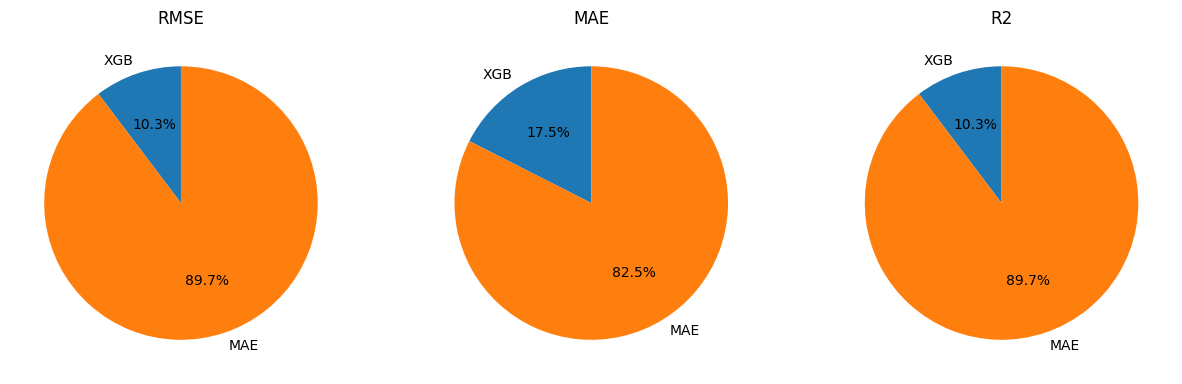

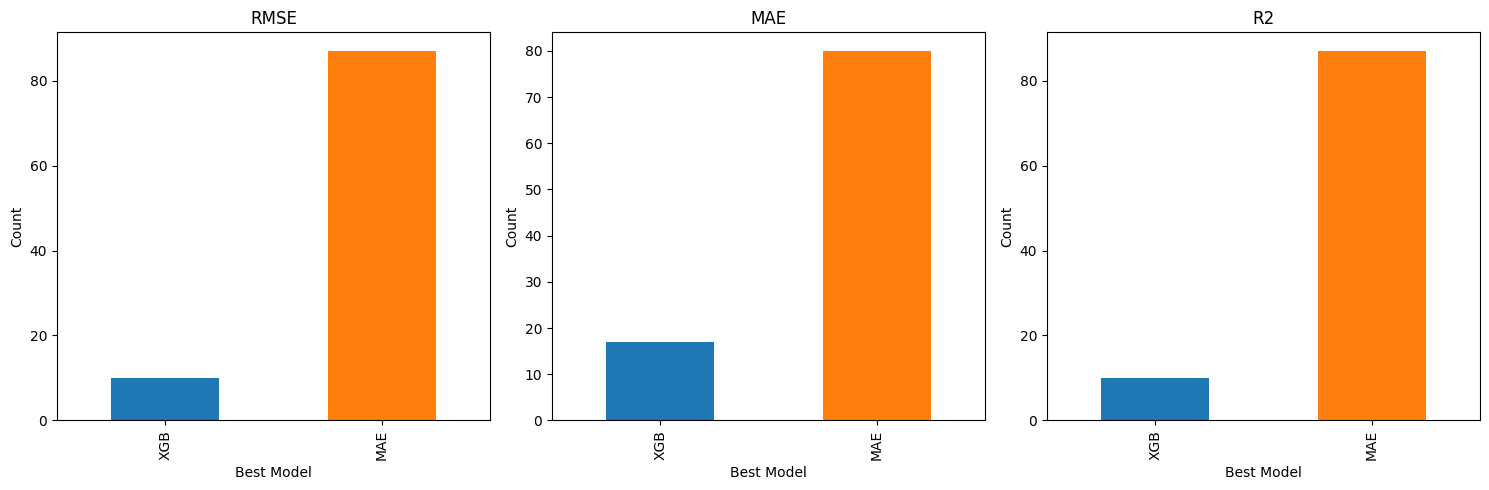

,RMSE,MAE,R2
MAE,87,80,87
XGB,10,17,10


In [8]:
# Function to determine which model performs better per lab per metric
def best_model(row):
    best_per_lab = {}
    for metric in ['RMSE', 'MAE', 'R2']:
        xgb_col = f'{metric}_XGB'
        mae_col = f'{metric}_MAE'
        if metric == 'R2':
            best_per_lab[metric] = 'XGB' if row[xgb_col] > row[mae_col] else 'MAE'  # Higher R2 is better
        else:
            best_per_lab[metric] = 'XGB' if row[xgb_col] < row[mae_col] else 'MAE'  # Lower RMSE/MAE is better
    return best_per_lab

# Create a dictionary with the best model per lab per metric
best_model_dict = df_pivot.apply(best_model, axis=1).to_dict()

# Retrieve the default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot a pie chart to show the distribution of the best models per metric
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(['RMSE', 'MAE', 'R2']):
    best_model_series = pd.Series({k: v[metric] for k, v in best_model_dict.items()})
    
    # Ensure MAE is the second element so it gets the second color (orange by default)
    ordered_series = best_model_series.value_counts().reindex(['XGB', 'MAE'])
    
    ordered_series.plot.pie(ax=axs[i], autopct='%1.1f%%', startangle=90, colors=default_colors[:len(ordered_series)], title=metric)
    axs[i].set_ylabel('')

# Plot a bar chart to show the distribution of the best models per metric
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(['RMSE', 'MAE', 'R2']):
    best_model_series = pd.Series({k: v[metric] for k, v in best_model_dict.items()})
    
    # Ensure MAE is the second element so it gets the default orange color
    ordered_series = best_model_series.value_counts().reindex(['XGB', 'MAE'])
    
    ordered_series.plot.bar(ax=axs[i], color=default_colors[:len(ordered_series)], title=metric)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Best Model')

plt.tight_layout()
plt.show()

# Plot the bar chart for distribution of the best models per metric as a table for easier comparison
best_model_df = {}
for metric in ['RMSE', 'MAE', 'R2']:
    best_model_series = pd.Series({k: v[metric] for k, v in best_model_dict.items()})
    best_model_df[metric] = best_model_series.value_counts()
    
best_model_df = pd.DataFrame(best_model_df)
best_model_df

### Plot the comparison of the results per lab value

<Figure size 1200x600 with 0 Axes>

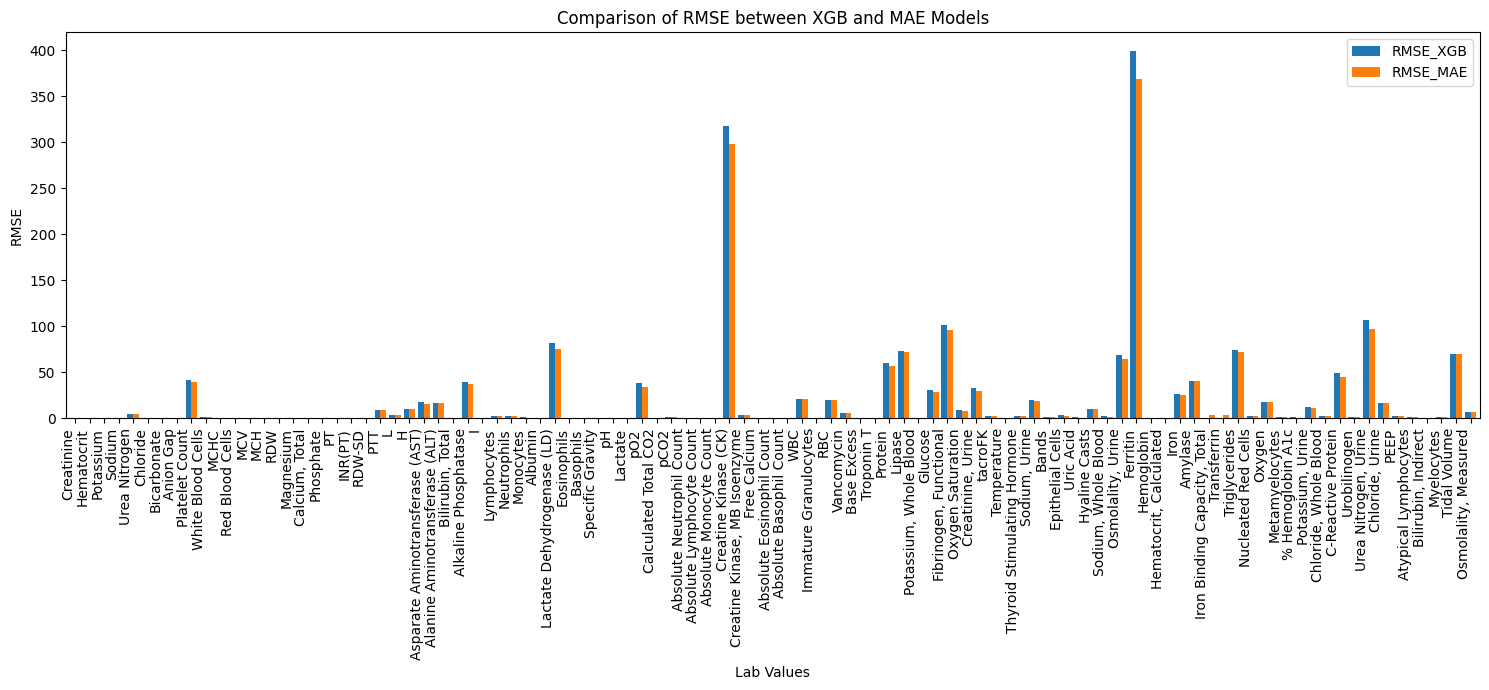

<Figure size 1200x600 with 0 Axes>

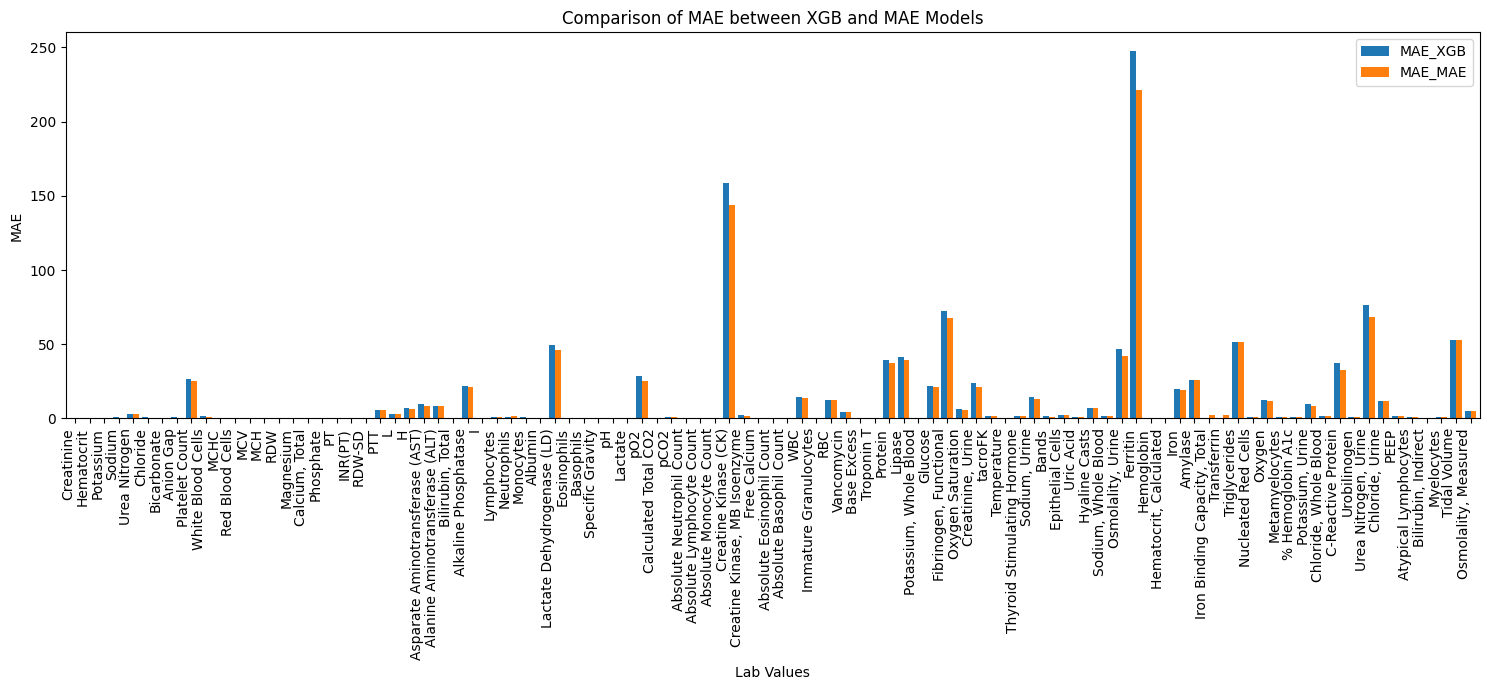

<Figure size 1200x600 with 0 Axes>

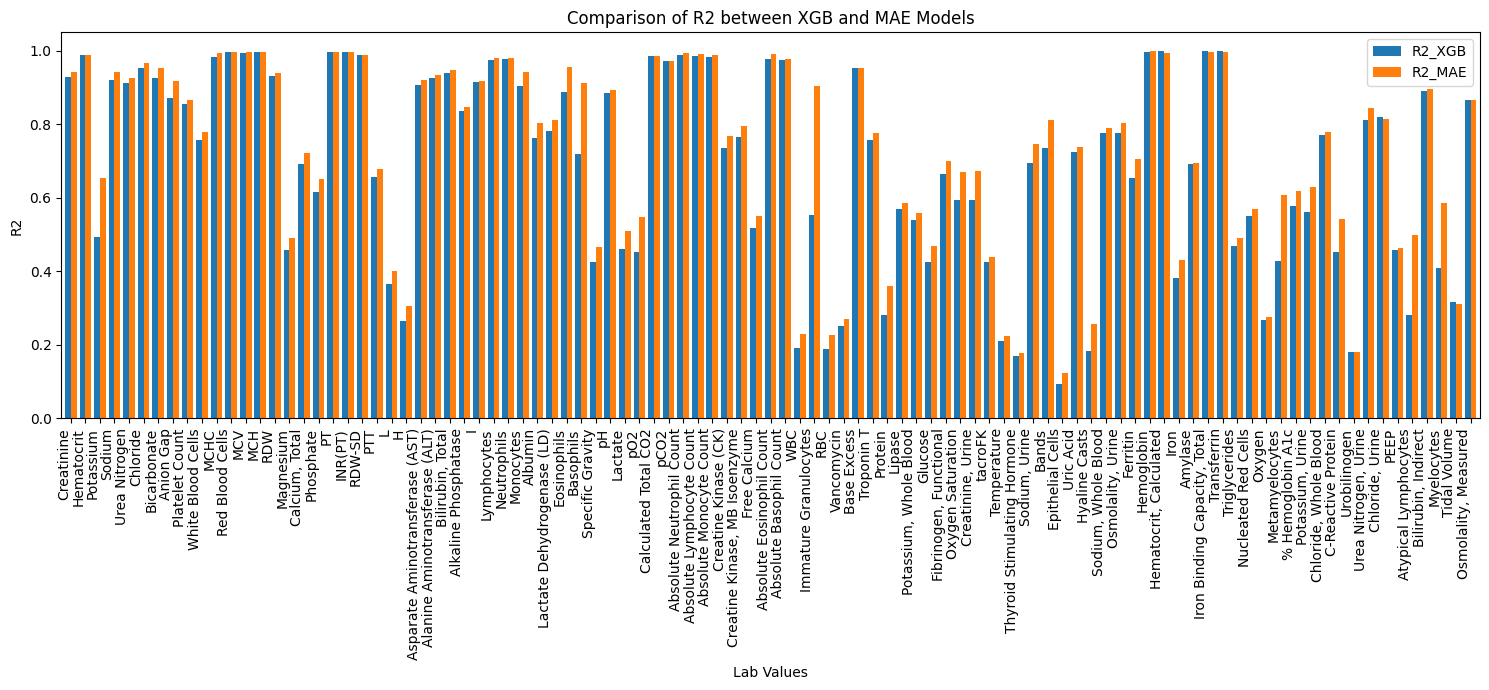

In [9]:
# Plot comparison for all labs
metrics = ['RMSE', 'MAE', 'R2']
df_pivot.reset_index(inplace=True)

for metric in metrics:
    plt.figure(figsize=(12, 6))
    df_pivot.plot(x='Column', y=[f'{metric}_XGB', f'{metric}_MAE'], kind='bar', width=0.8, figsize=(15, 7))
    plt.title(f'Comparison of {metric} between XGB and MAE Models')
    plt.ylabel(metric)
    plt.xlabel("Lab Values")
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

#### Comparison of the results for the top 20 lab values

<Figure size 1200x600 with 0 Axes>

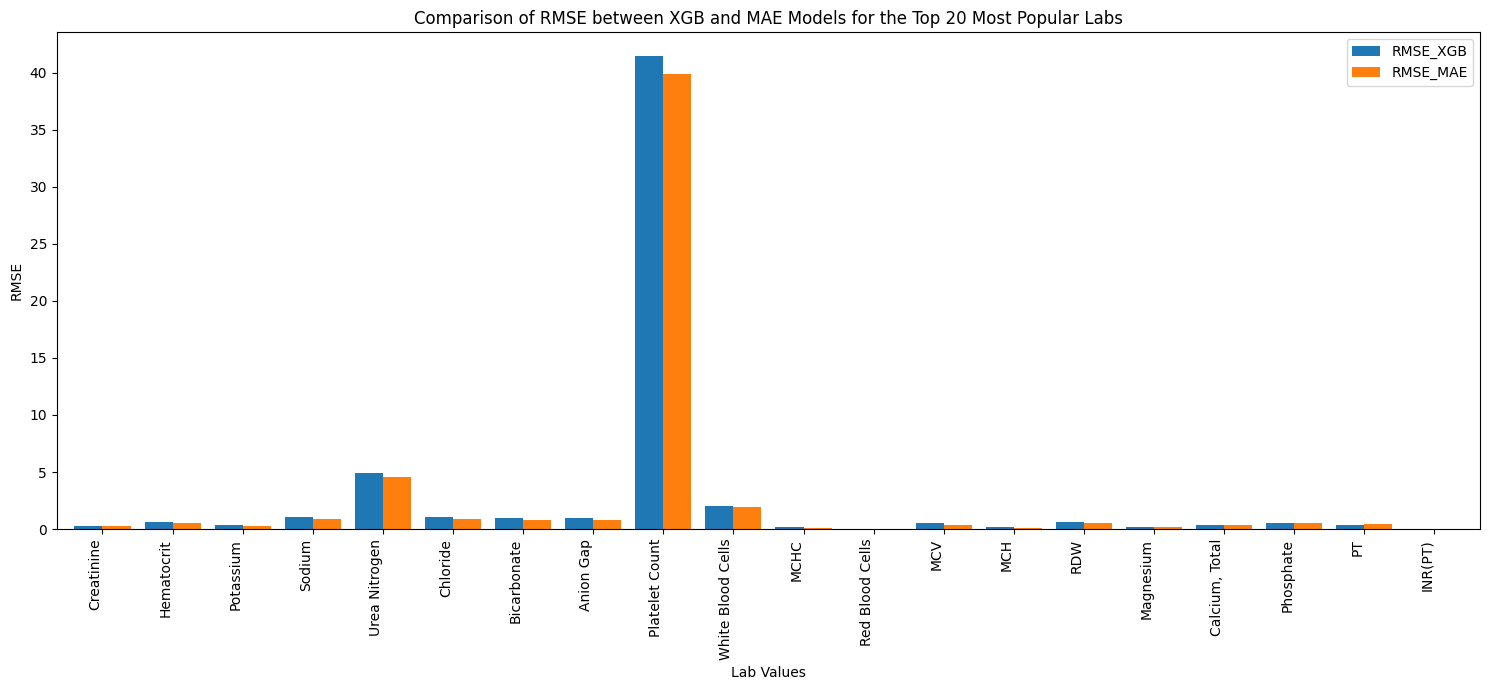

               Column   RMSE_XGB   RMSE_MAE
0          Creatinine   0.260503   0.232567
1          Hematocrit   0.578591   0.563751
2           Potassium   0.327172   0.270446
3              Sodium   1.035059   0.883104
4       Urea Nitrogen   4.909659   4.531328
5            Chloride   1.048571   0.876029
6         Bicarbonate   0.959481   0.768633
7           Anion Gap   1.007826   0.808470
8      Platelet Count  41.464468  39.861015
9   White Blood Cells   2.034082   1.934959
10               MCHC   0.194270   0.113760
11    Red Blood Cells   0.044065   0.035345
12                MCV   0.518426   0.400747
13                MCH   0.158519   0.108629
14                RDW   0.578758   0.549347
15          Magnesium   0.183774   0.177932
16     Calcium, Total   0.342332   0.324256
17          Phosphate   0.535880   0.510569
18                 PT   0.376635   0.417037
19            INR(PT)   0.029712   0.038563


<Figure size 1200x600 with 0 Axes>

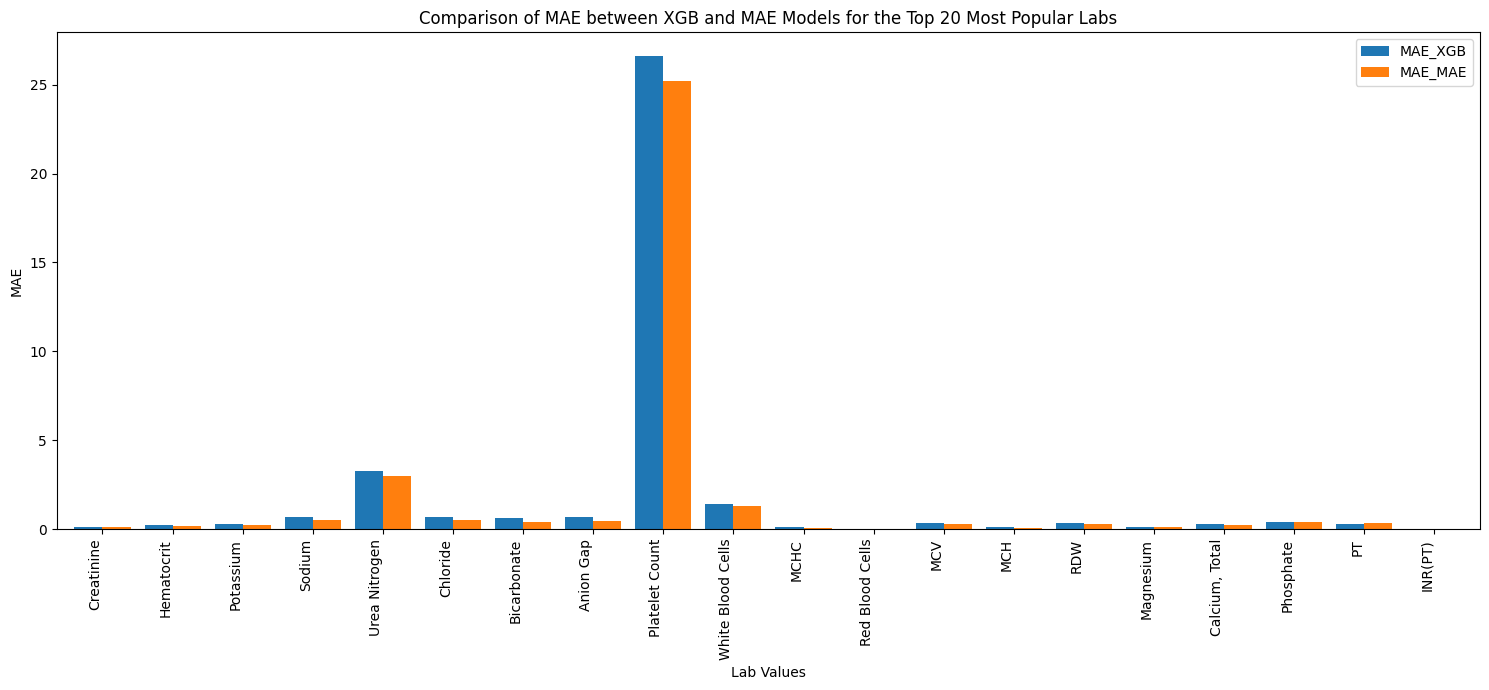

               Column    MAE_XGB    MAE_MAE
0          Creatinine   0.143620   0.131968
1          Hematocrit   0.220715   0.197031
2           Potassium   0.258758   0.208854
3              Sodium   0.672486   0.492014
4       Urea Nitrogen   3.270549   3.010252
5            Chloride   0.684399   0.497968
6         Bicarbonate   0.634142   0.411688
7           Anion Gap   0.682281   0.436680
8      Platelet Count  26.616683  25.215863
9   White Blood Cells   1.402734   1.304642
10               MCHC   0.134021   0.067657
11    Red Blood Cells   0.022894   0.016445
12                MCV   0.352366   0.290318
13                MCH   0.108663   0.072081
14                RDW   0.320713   0.296335
15          Magnesium   0.141322   0.135799
16     Calcium, Total   0.259224   0.243953
17          Phosphate   0.413080   0.391269
18                 PT   0.289973   0.316521
19            INR(PT)   0.018668   0.029452


<Figure size 1200x600 with 0 Axes>

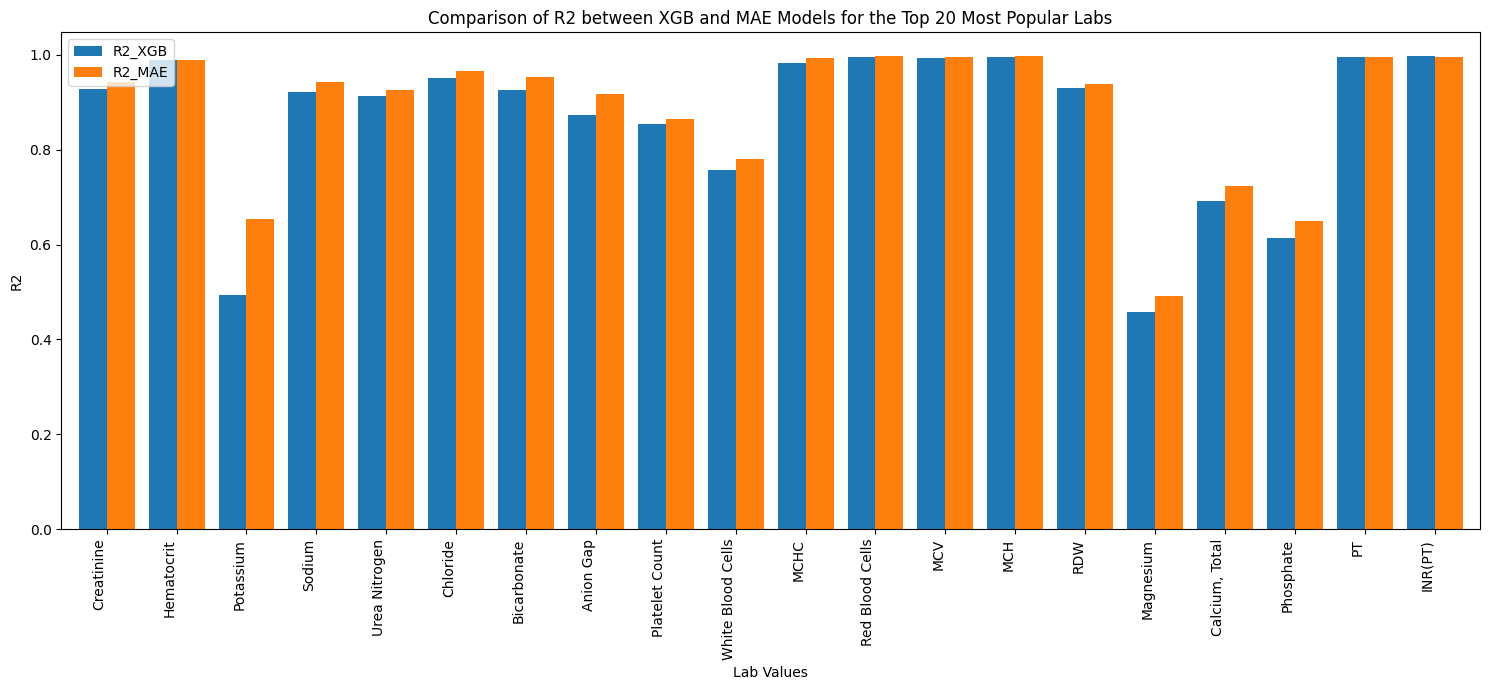

               Column    R2_XGB    R2_MAE
0          Creatinine  0.928693  0.943167
1          Hematocrit  0.988744  0.989314
2           Potassium  0.494088  0.654313
3              Sodium  0.921317  0.942723
4       Urea Nitrogen  0.912527  0.925489
5            Chloride  0.952161  0.966610
6         Bicarbonate  0.926923  0.953103
7           Anion Gap  0.872367  0.917867
8      Platelet Count  0.854836  0.865846
9   White Blood Cells  0.757072  0.780171
10               MCHC  0.982448  0.993981
11    Red Blood Cells  0.995552  0.997138
12                MCV  0.992985  0.995808
13                MCH  0.995422  0.997850
14                RDW  0.931321  0.938124
15          Magnesium  0.457297  0.491256
16     Calcium, Total  0.691016  0.722785
17          Phosphate  0.614521  0.650076
18                 PT  0.996201  0.995343
19            INR(PT)  0.997413  0.995641


In [10]:
# Plot comparison for the top 20 most popular labs
metrics = ['RMSE', 'MAE', 'R2']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    df_pivot[:20].plot(x='Column', y=[f'{metric}_XGB', f'{metric}_MAE'], kind='bar', width=0.8, figsize=(15, 7))
    plt.title(f'Comparison of {metric} between XGB and MAE Models for the Top 20 Most Popular Labs')
    plt.ylabel(metric)
    plt.xlabel("Lab Values")
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Show a table with the comparison
    print(df_pivot[:20][['Column', f'{metric}_XGB', f'{metric}_MAE']])

In [11]:
# Calculate mean values for each model
mean_performance = results_df.groupby('Model').mean()
mean_performance

/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_91142/3083297774.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_performance = results_df.groupby('Model').mean()


,RMSE,MAE,R2,Err,itemid
Model,,,,,
MAE,18.410756,11.503231,0.726398,0.0,51115.78
XGB,19.445984,12.365286,0.691986,0.0,51115.78


## Compare the results of our MAE model vs and XGBoost per Race (fairness analysis)

In order to assess the fairness of our model, and understand if the risks and limitations of our model, we will compare the results of our MAE model vs an XGBoost grouped by 5 different groups of patients based on the race. We groupped the patients in the following groups:

* White
* Black
* Asian
* Hispanic
* Other

The metrics calculated are the following:

* MAE
* RMSE
* R2

You can replicate our results using the following command:

```bash
python run_test_mae_race.py
```

In [12]:
results_df_race = pd.read_csv('results/results_test_mae_xgb_per_race.csv')
results_df_race.Column = results_df_race.Column.str.replace('npval_', '').astype(int)
# Match 'Column' with 'itemid' to get the lab names in labs using the column 'label' and save in 'Column'
results_df_race = results_df_race.merge(labs[['itemid', 'label']], left_on='Column', right_on='itemid', how='left')
results_df_race = results_df_race.drop(columns=['Column'])
results_df_race = results_df_race.rename(columns={'label': 'Column'})
results_df_race['Popularity'] = results_df_race.Column.map(most_popular_labs)
results_df_race

,RMSE,MAE,R2,Err,Model,Race,itemid,Column,Popularity
0,0.267974,0.206715,0.648681,0,MAE,White,50971,Potassium,90080
1,0.855640,0.475409,0.945281,0,MAE,White,50983,Sodium,89609
2,0.853832,0.486728,0.967105,0,MAE,White,50902,Chloride,89533
3,0.571612,0.198952,0.988850,0,MAE,White,51221,Hematocrit,90090
4,0.223452,0.128542,0.935377,0,MAE,White,50912,Creatinine,90094
...,...,...,...,...,...,...,...,...,...
995,1.493036,1.090026,0.333209,0,XGB,Others,51143,Atypical Lymphocytes,1349
996,109.232684,79.483511,0.821457,0,XGB,Others,51104,"Urea Nitrogen, Urine",1555
997,16.969888,12.404504,0.817311,0,XGB,Others,51078,"Chloride, Urine",1501
998,0.469939,0.296299,0.928837,0,XGB,Others,50884,"Bilirubin, Indirect",1345


In [13]:
# Pivot the DataFrame to organize by model, race, and column for easier comparison
df_pivot = results_df_race.pivot_table(index=['Column', 'Race'], columns='Model', values=['RMSE', 'MAE', 'R2'], aggfunc='first')
df_pivot.columns = [f'{metric}_{model}' for metric, model in df_pivot.columns]

df_pivot

MAE_MAE   MAE_XGB    R2_MAE    R2_XGB  RMSE_MAE  \
Column           Race                                                         
% Hemoglobin A1c Asian     0.504316  0.702306  0.750632  0.577433  0.718104   
                 Black     0.761370  0.795066  0.650351  0.615819  1.078834   
                 Hispanic  0.943884  1.043526  0.540449  0.382113  1.298484   
                 Others    0.734239  0.794464  0.598730  0.556625  1.080267   
                 White     0.656451  0.693432  0.590748  0.570839  0.953785   
...                             ...       ...       ...       ...       ...   
tacroFK          Asian     1.731379  1.779132  0.429636  0.411906  2.243355   
                 Black     1.930443  1.962707  0.427593  0.409634  2.504507   
                 Hispanic  1.929180  1.883621  0.365176  0.381966  2.486946   
                 Others    1.702149  1.642760  0.392173  0.407801  2.258375   
                 White     1.813484  1.829712  0.440128  0.420975  2.377219   

                           RMSE_XGB  
Column           Race                
% Hemoglobin A1c Asian     0.934792  
                 Black     1.130853  
                 Hispanic  1.505650  
                 Others    1.135529  
                 White     0.976709  
...                             ...  
tacroFK          Asian     2.277955  
                 Black     2.543493  
                 Hispanic  2.453839  
                 Others    2.229152  
                 White     2.417539  

[485 rows x 6 columns]

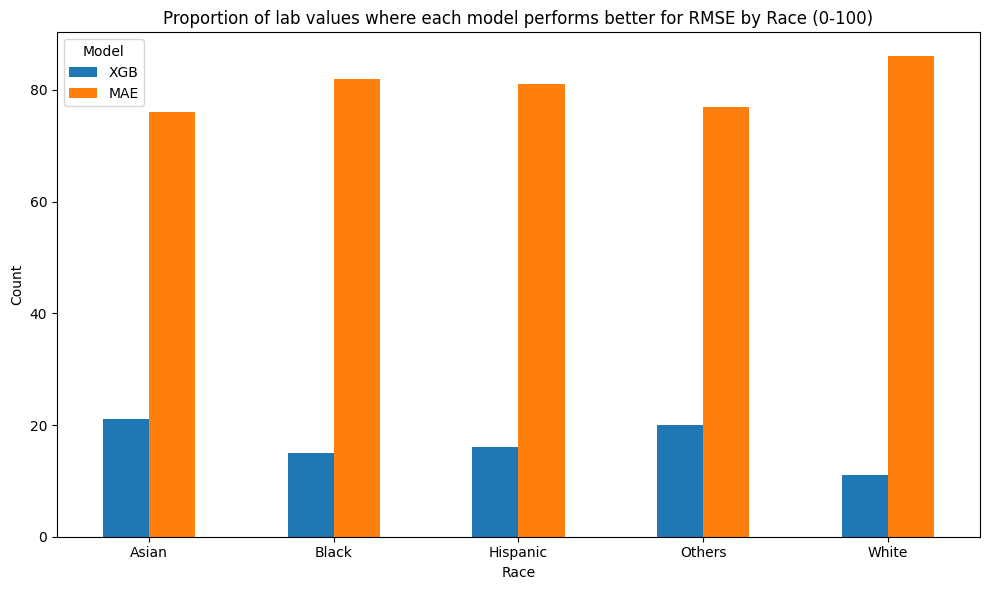

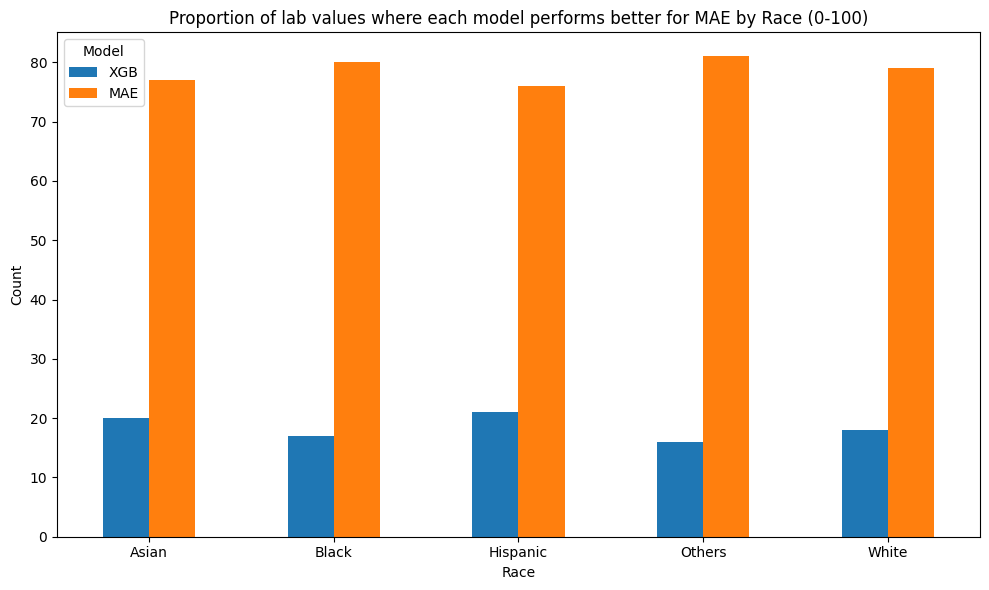

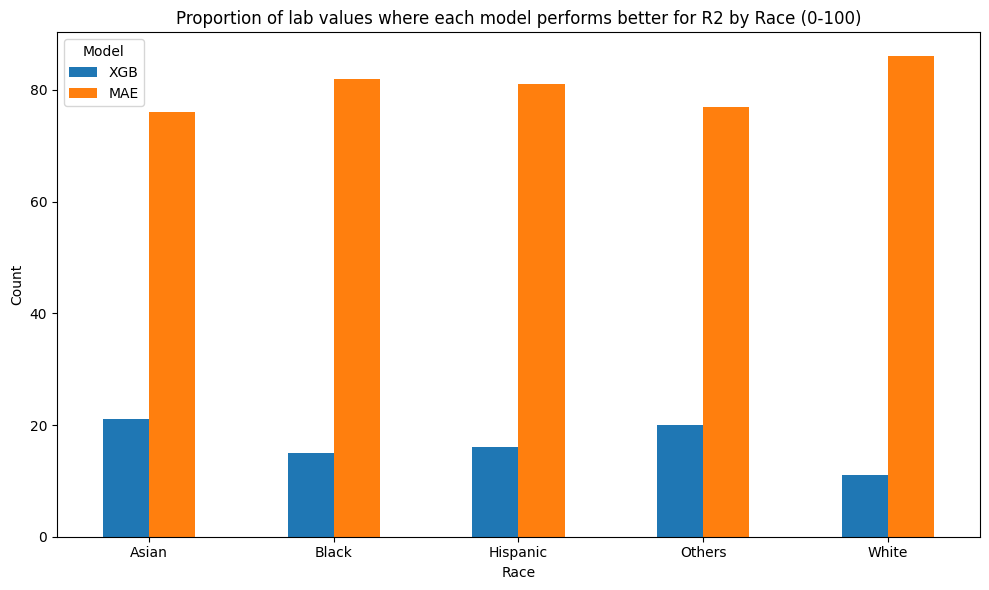

In [14]:
# Function to determine which model performs better per lab per metric
def best_model(row):
    best_per_lab = {}
    for metric in ['RMSE', 'MAE', 'R2']:
        xgb_col = f'{metric}_XGB'
        mae_col = f'{metric}_MAE'
        if metric == 'R2':
            best_per_lab[metric] = 'XGB' if row.get(xgb_col, float('-inf')) > row.get(mae_col, float('-inf')) else 'MAE'  # Higher R2 is better
        else:
            best_per_lab[metric] = 'XGB' if row.get(xgb_col, float('inf')) < row.get(mae_col, float('inf')) else 'MAE'  # Lower RMSE/MAE is better
    return best_per_lab

# Apply best model function
best_model_dict_race = df_pivot.apply(best_model, axis=1).to_dict()
best_model_dict_race

# Convert the dictionary to a DataFrame for easier analysis
data = []

for (lab, race), metrics in best_model_dict_race.items():
    for metric, model in metrics.items():
        data.append({'Race': race, 'Metric': metric, 'Model': model})

df = pd.DataFrame(data)


# Count the occurrences of MAE and XGB for each race and metric
model_counts = df.groupby(['Race', 'Metric', 'Model']).size().unstack(fill_value=0)

# Retrieve the default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot stacked bar chart with MAE as the first color
for metric in ['RMSE', 'MAE', 'R2']:
    model_counts_metric = model_counts.loc[:, metric, :]
    
    # Reindex to make MAE come first in the stack
    model_counts_metric = model_counts_metric[['XGB', 'MAE']]
    
    model_counts_metric.plot(kind='bar', figsize=(10, 6), color=default_colors[:2])
    
    plt.title(f'Proportion of lab values where each model performs better for {metric} by Race (0-100)')
    plt.ylabel('Count')
    plt.xlabel('Race')
    plt.xticks(rotation=0)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()

### Analysis of the Masked Autoencoder (MAE) model per race

In [15]:
# Filter for MAE model and group by race for comparison
df_mae = results_df_race[results_df_race['Model'] == 'MAE']

### Analysis of all the lab values

In [16]:
df_mae

,RMSE,MAE,R2,Err,Model,Race,itemid,Column,Popularity
0,0.267974,0.206715,0.648681,0,MAE,White,50971,Potassium,90080
1,0.855640,0.475409,0.945281,0,MAE,White,50983,Sodium,89609
2,0.853832,0.486728,0.967105,0,MAE,White,50902,Chloride,89533
3,0.571612,0.198952,0.988850,0,MAE,White,51221,Hematocrit,90090
4,0.223452,0.128542,0.935377,0,MAE,White,50912,Creatinine,90094
...,...,...,...,...,...,...,...,...,...
495,1.418931,0.955429,0.397758,0,MAE,Others,51143,Atypical Lymphocytes,1349
496,95.205850,70.460859,0.864367,0,MAE,Others,51104,"Urea Nitrogen, Urine",1555
497,17.424633,12.383827,0.807389,0,MAE,Others,51078,"Chloride, Urine",1501
498,0.469475,0.296289,0.928977,0,MAE,Others,50884,"Bilirubin, Indirect",1345


Plotting White
Plotting Black
Plotting Hispanic
Plotting Asian
Plotting Others


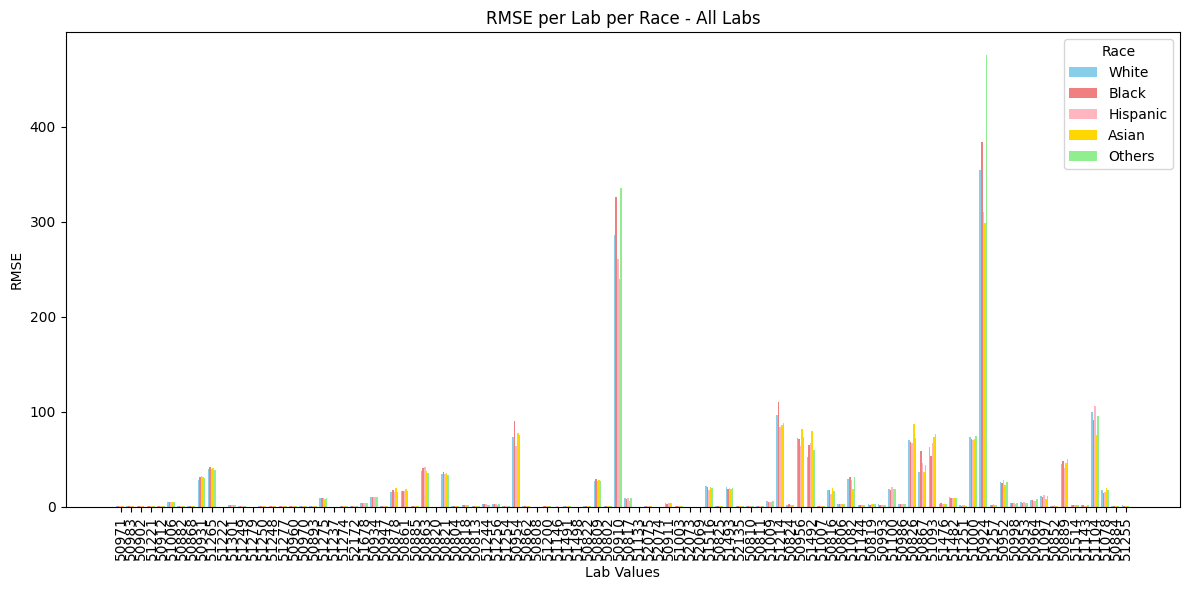

Plotting White
Plotting Black
Plotting Hispanic
Plotting Asian
Plotting Others


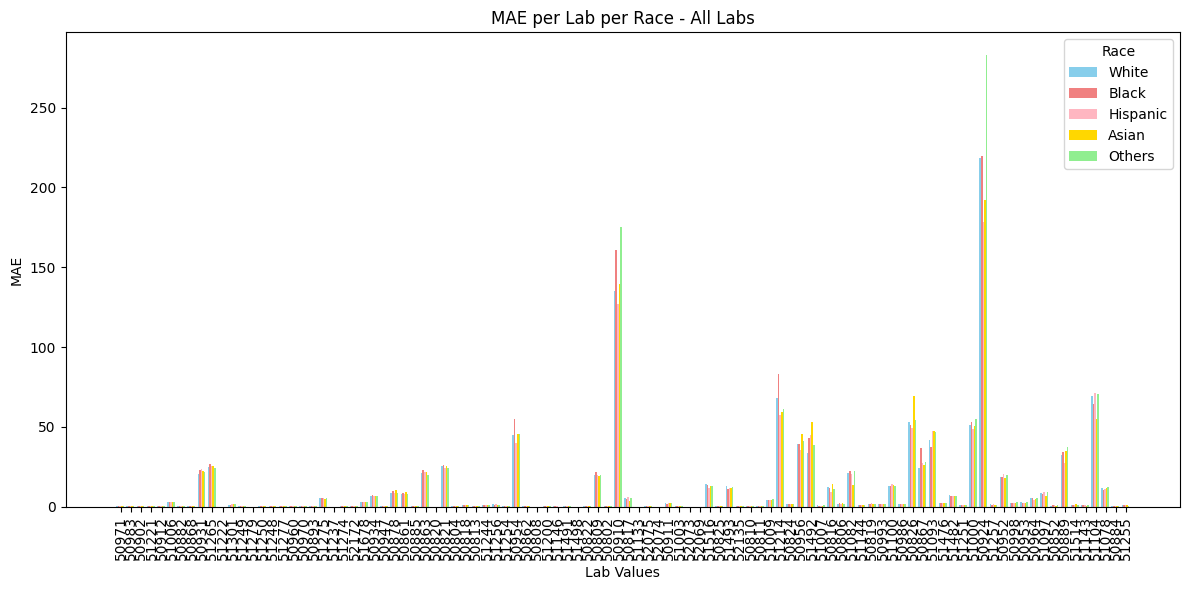

Plotting White
Plotting Black
Plotting Hispanic
Plotting Asian
Plotting Others


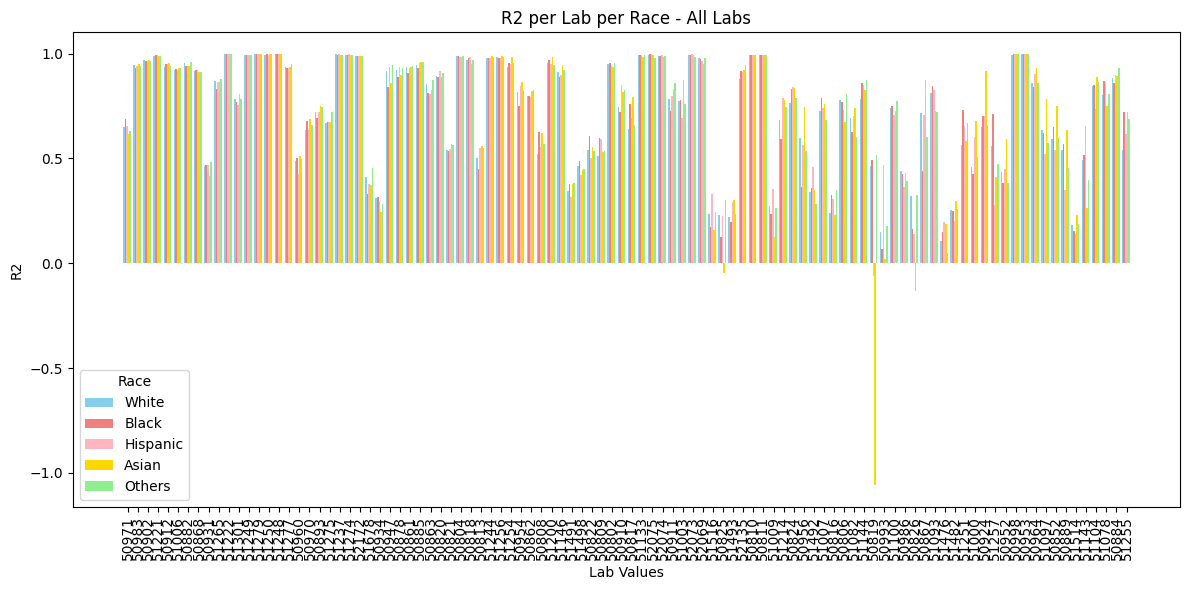

Race        Asian      Black   Hispanic     Others      White
itemid                                                       
50802    0.724641   0.750110   0.739014   0.738827   0.716956
50804    0.657630   0.726396   0.703928   0.632401   0.639225
50806    2.611660   2.521103   2.255827   2.340353   2.395317
50808    0.053473   0.050774   0.053322   0.052137   0.051689
50809   27.779306  29.127909  27.101133  27.166495  27.367080
...           ...        ...        ...        ...        ...
52073    0.012219   0.013647   0.008814   0.021510   0.015664
52074    0.058474   0.045304   0.028001   0.042498   0.044222
52075    0.357092   0.278127   0.244789   0.651350   0.312576
52135    0.136178   0.136906   0.130316   0.132448   0.158416
52172    0.882184   0.883314   0.738626   0.899637   0.815180

[100 rows x 5 columns]
Race        Asian      Black   Hispanic     Others      White
itemid                                                       
50802    0.481551   0.469498   0.484051   0.48

In [17]:
# Custom color palette for races
color_palette = {
    'White': 'skyblue',
    'Others': 'lightgreen',
    'Black': 'lightcoral',
    'Asian': 'gold',
    'Hispanic': 'lightpink'
}

def plot_grouped_metrics_with_spacing_and_colors(metric, df, title, column='Column'):
    plt.figure(figsize=(12, 6))
    unique_races = df['Race'].unique()
    lab_values = df[column].unique()
    bar_width = 0.2
    x = range(len(lab_values))

    spacing = 0.3  # Increase spacing between groups
    for i, race in enumerate(unique_races):
        print(f"Plotting {race}")
        x_race = [pos + i * bar_width + spacing * pos for pos in x]  # Add spacing between groups
        df_race = df[df['Race'] == race]
        color = color_palette.get(race, 'gray')  # Use color palette or default to gray
        plt.bar(x_race, df_race[metric], width=bar_width, label=race, color=color)

    plt.title(f"{metric} per Lab per Race - {title}")
    plt.xlabel("Lab Values")
    plt.ylabel(metric)
    plt.xticks([r + (len(unique_races) / 2) * bar_width + spacing * r for r in range(len(lab_values))], lab_values, rotation=90)
    plt.legend(title="Race")
    plt.tight_layout()
    plt.show()

# Function to display table per metric
def display_metric_table(metric, df, column='Column'):
    table_df = df.pivot(index=column, columns='Race', values=metric)
    print(table_df)
    
# Grouped bar plot with spacing and custom colors for all lab values
plot_grouped_metrics_with_spacing_and_colors('RMSE', df_mae, "All Labs", 'itemid')
plot_grouped_metrics_with_spacing_and_colors('MAE', df_mae, "All Labs", 'itemid')
plot_grouped_metrics_with_spacing_and_colors('R2', df_mae, "All Labs", 'itemid')

# Displaying tables per metric for all lab values
display_metric_table('RMSE', df_mae, 'itemid')
display_metric_table('MAE', df_mae, 'itemid')
display_metric_table('R2', df_mae, 'itemid')

### Analysis of the top 20 lab values

In [18]:
# Sorting by popularity for top 20 labs
df_top20 = df_mae.nlargest(20*5, 'Popularity')
df_top20

,RMSE,MAE,R2,Err,Model,Race,itemid,Column,Popularity
4,0.223452,0.128542,0.935377,0,MAE,White,50912,Creatinine,90094
104,0.261628,0.143172,0.952492,0,MAE,Black,50912,Creatinine,90094
204,0.229736,0.131821,0.952221,0,MAE,Hispanic,50912,Creatinine,90094
304,0.245948,0.132962,0.956528,0,MAE,Asian,50912,Creatinine,90094
404,0.234855,0.134540,0.938382,0,MAE,Others,50912,Creatinine,90094
...,...,...,...,...,...,...,...,...,...
21,0.039170,0.029660,0.995674,0,MAE,White,51237,INR(PT),44231
121,0.037594,0.029259,0.995609,0,MAE,Black,51237,INR(PT),44231
221,0.037261,0.028962,0.996007,0,MAE,Hispanic,51237,INR(PT),44231
321,0.033657,0.026417,0.995488,0,MAE,Asian,51237,INR(PT),44231


Plotting White
Plotting Black
Plotting Hispanic
Plotting Asian
Plotting Others


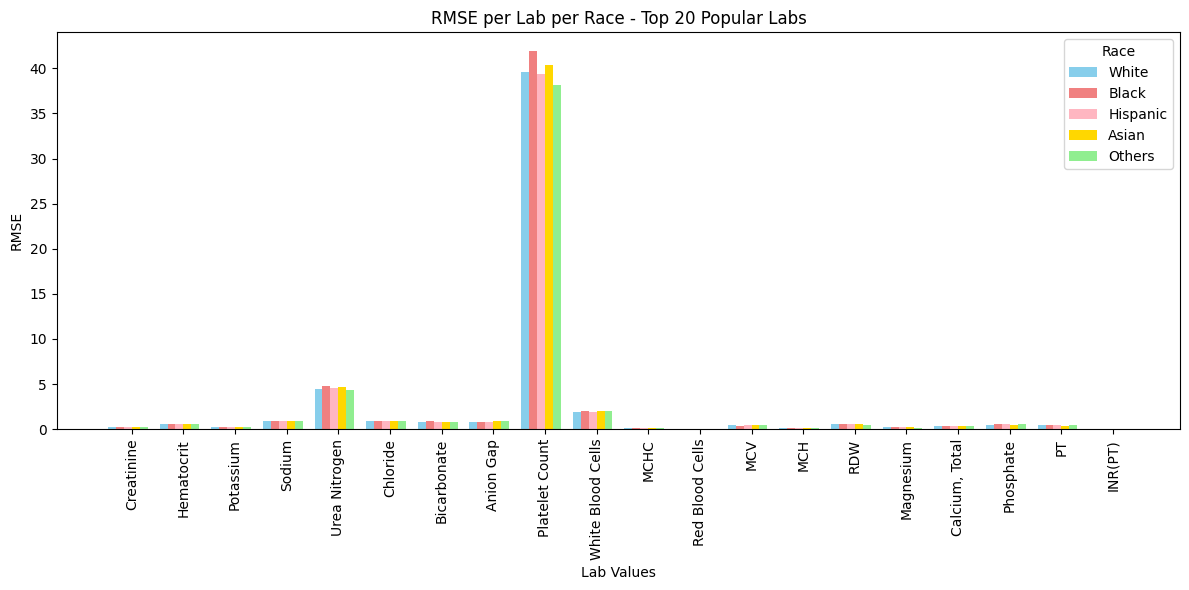

Plotting White
Plotting Black
Plotting Hispanic
Plotting Asian
Plotting Others


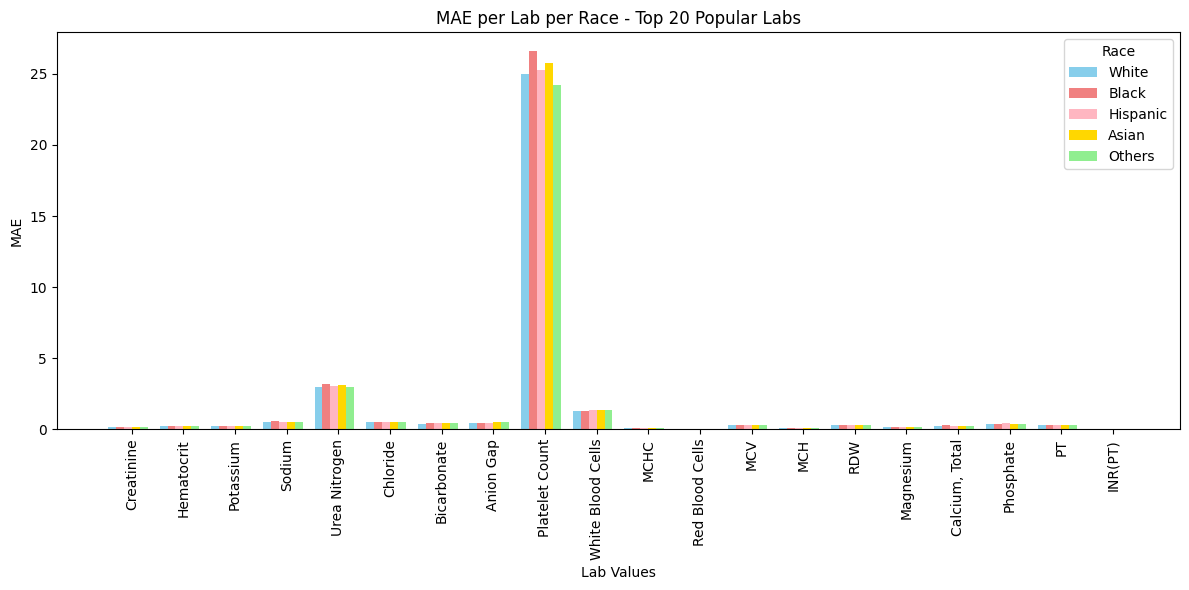

Plotting White
Plotting Black
Plotting Hispanic
Plotting Asian
Plotting Others


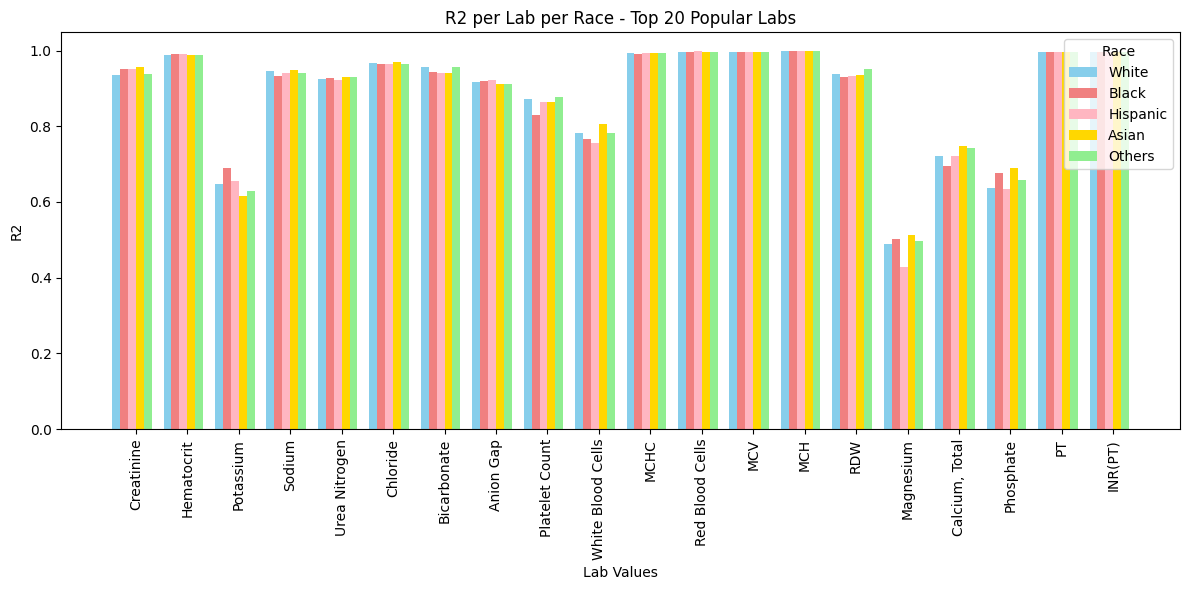

Race                   Asian      Black   Hispanic     Others      White
Column                                                                  
Anion Gap           0.863965   0.834027   0.768450   0.859935   0.792837
Bicarbonate         0.814009   0.866536   0.814290   0.759970   0.736664
Calcium, Total      0.317565   0.343641   0.325656   0.319174   0.320177
Chloride            0.874638   0.923711   0.903508   0.916802   0.853832
Creatinine          0.245948   0.261628   0.229736   0.234855   0.223452
Hematocrit          0.603492   0.526436   0.527607   0.575224   0.571612
INR(PT)             0.033657   0.037594   0.037261   0.038022   0.039170
MCH                 0.104865   0.110793   0.113235   0.108812   0.107794
MCHC                0.109645   0.126761   0.125878   0.114649   0.109157
MCV                 0.400531   0.377365   0.405737   0.401725   0.406346
Magnesium           0.177743   0.178325   0.182174   0.176377   0.177767
PT                  0.361776   0.402969   0.406693 

Race,Asian,Black,Hispanic,Others,White
Column,,,,,
Anion Gap,0.910455,0.919743,0.922255,0.910979,0.918122
Bicarbonate,0.941860,0.943108,0.941197,0.957739,0.956181
"Calcium, Total",0.747930,0.695001,0.721078,0.743900,0.721091
Chloride,0.970214,0.965344,0.964723,0.965095,0.967105
Creatinine,0.956528,0.952492,0.952221,0.938382,0.935377
Hematocrit,0.988414,0.991076,0.990995,0.988541,0.988850
INR(PT),0.995488,0.995609,0.996007,0.995062,0.995674
MCH,0.998232,0.997885,0.997528,0.997792,0.997742
MCHC,0.994086,0.992180,0.992345,0.993607,0.994467


In [19]:
# Grouped bar plot with spacing and custom colors for top 20 popular labs
plot_grouped_metrics_with_spacing_and_colors('RMSE', df_top20, "Top 20 Popular Labs")
plot_grouped_metrics_with_spacing_and_colors('MAE', df_top20, "Top 20 Popular Labs")
plot_grouped_metrics_with_spacing_and_colors('R2', df_top20, "Top 20 Popular Labs")

# Displaying tables per metric for top 20 popular labs
display_metric_table('RMSE', df_top20)
display_metric_table('MAE', df_top20)
display_metric_table('R2', df_top20)

df_top20.pivot(index='Column', columns='Race', values='R2')

In [20]:
# Group by race and calculate the mean of each metric
race_comparison = df_pivot.groupby('Race').agg({
    'MAE_MAE': 'mean',
    'R2_MAE': 'mean',
    'RMSE_MAE': 'mean'
}).reset_index()

race_comparison

,Race,MAE_MAE,R2_MAE,RMSE_MAE
0,Asian,11.439956,0.719118,17.439232
1,Black,12.167318,0.721337,19.526098
2,Hispanic,10.831335,0.724421,17.499449
3,Others,12.735121,0.729669,20.277888
4,White,11.443600,0.723908,18.304037


## Follow-up Analysis:

In some cases there's already a follow-up that can be used for the model to predict the target lab value. To understand the performance of the model with follow-up and without follow-up, we will analyze the number of lab values with follow-up and without follow-up in the test set and the performance of the model in each case.

In [21]:
# Get the list of 'npval' and 'npval_last' columns
npval_columns = [col for col in df_test.columns if col.startswith('npval_') and not col.startswith('npval_last_')]
npval_last_columns = [col for col in df_test.columns if col.startswith('npval_last_')]

##### Get the follow up values per lab test

We'll use the columns npval_{lab_id} with npval_last_{lab_id} to get the follow-up values for each lab test, if the column npval_last_{lab_id} is not null, then we have a follow-up value for the lab test.

In [22]:
# Counting how many times a patient has a follow-up for each lab value
follow_up_counts = {}

for npval_col in npval_columns:
    # Get corresponding npval_last column
    npval_id = npval_col.split('_')[1]
    npval_last_col = f'npval_last_{npval_id}'
    
    if npval_last_col in df_test.columns:
        # Count non-null values where both npval and npval_last are present
        count = df_test[[npval_col, npval_last_col]].dropna().shape[0]
        follow_up_counts[npval_id] = count


In [23]:
# Counting total npval values for each lab (non-null values)
total_counts = {}

for npval_col in npval_columns:
    # Count non-null values for each npval
    count = df_test[npval_col].notna().sum()
    npval_id = npval_col.split('_')[1]
    total_counts[npval_id] = count

# Merging follow-up counts with total counts to understand the proportion
comparison_df = pd.DataFrame({
    'Lab ID': follow_up_counts.keys(),
    'Total npval Count': total_counts.values(),
    'Follow-up Count': follow_up_counts.values()
})

# Calculating the proportion of follow-up counts
comparison_df['Follow-up Proportion'] = comparison_df['Follow-up Count'] / comparison_df['Total npval Count']


In [24]:
comparison_df

,Lab ID,Total npval Count,Follow-up Count,Follow-up Proportion
0,50971,90080,71008,0.788277
1,50983,89609,70609,0.787968
2,50902,89533,70554,0.788022
3,51221,90090,70205,0.779276
4,50912,90094,70870,0.786623
...,...,...,...,...
95,51143,1349,725,0.537435
96,51104,1555,303,0.194855
97,51078,1501,336,0.223851
98,50884,1345,618,0.459480


### Analysis of the Masked Autoencoder (MAE) model with follow-up VS without follow-up

In [25]:
followup_df = pd.read_csv('results/results_test_mae_xgb_follow_up.csv')
followup_df.Column = followup_df.Column.str.replace('npval_', '').astype(int)
# Match 'Column' with 'itemid' to get the lab names in labs using the column 'label' and save in 'Column'
followup_df = followup_df.merge(labs[['itemid', 'label']], left_on='Column', right_on='itemid', how='left')
followup_df = followup_df.drop(columns=['Column'])
followup_df = followup_df.rename(columns={'label': 'Column'})

followup_df

,Follow-Up,RMSE,MAE,R2,Err,Model,itemid,Column
0,with_follow_up,0.311434,0.246133,0.537547,0,XGB,50971,Potassium
1,without_follow_up,0.381470,0.307090,0.333261,0,XGB,50971,Potassium
2,with_follow_up,0.963716,0.639611,0.933972,0,XGB,50983,Sodium
3,without_follow_up,1.269720,0.797172,0.864098,0,XGB,50983,Sodium
4,with_follow_up,0.963401,0.646596,0.960738,0,XGB,50902,Chloride
...,...,...,...,...,...,...,...,...
395,without_follow_up,16.913079,11.439712,0.810074,0,MAE,51078,"Chloride, Urine"
396,with_follow_up,0.491641,0.304144,0.912339,0,MAE,50884,"Bilirubin, Indirect"
397,without_follow_up,0.518868,0.321041,0.874207,0,MAE,50884,"Bilirubin, Indirect"
398,with_follow_up,1.455692,1.015175,0.556808,0,MAE,51255,Myelocytes


In [26]:
# Pivoting the DataFrame to organize by Follow-Up and column for easier comparison
df_pivot = followup_df.pivot_table(index='Column', columns='Follow-Up', values=['RMSE', 'MAE', 'R2'], aggfunc='first')
df_pivot.columns = [f'{metric}_{model}' for metric, model in df_pivot.columns]

# Sort the dataset by the most popular labs
df_pivot['Popularity'] = df_pivot.index.map(most_popular_labs)
df_pivot.sort_values('Popularity', ascending=False, inplace=True)

# Display the organized dataset
df_pivot

,MAE_with_follow_up,MAE_without_follow_up,R2_with_follow_up,R2_without_follow_up,RMSE_with_follow_up,RMSE_without_follow_up,Popularity
Column,,,,,,,
Creatinine,0.106161,0.284010,0.972196,0.712018,0.166807,0.466813,90094
Hematocrit,0.215361,0.240614,0.989095,0.983732,0.549613,0.675482,90090
Potassium,0.246133,0.307090,0.537547,0.333261,0.311434,0.381470,90080
Sodium,0.639611,0.797172,0.933972,0.864098,0.963716,1.269720,89609
Urea Nitrogen,2.722148,5.323561,0.946166,0.737409,3.952850,7.473268,89591
...,...,...,...,...,...,...,...
Atypical Lymphocytes,1.307899,1.101672,0.304579,0.214932,1.720535,1.541858,1349
"Bilirubin, Indirect",0.316091,0.321319,0.913242,0.861710,0.489103,0.544031,1345
Myelocytes,1.266182,0.909520,0.381873,0.383495,1.719144,1.284321,1254


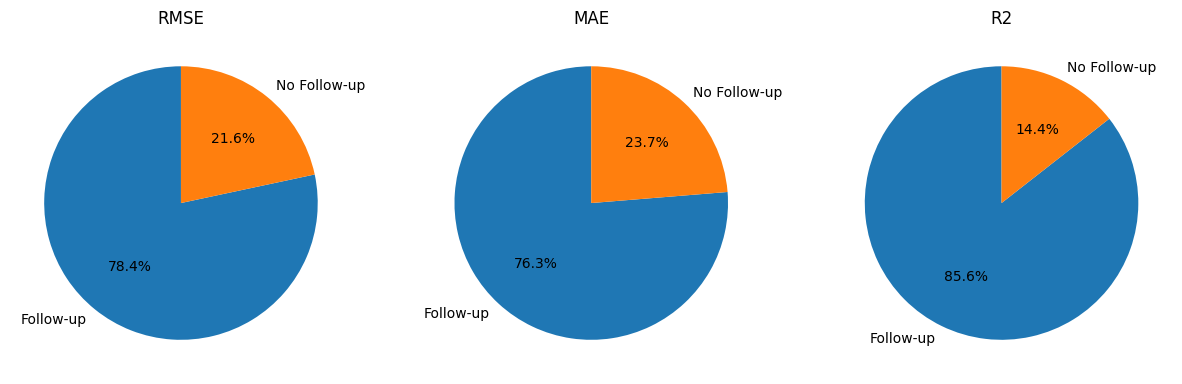

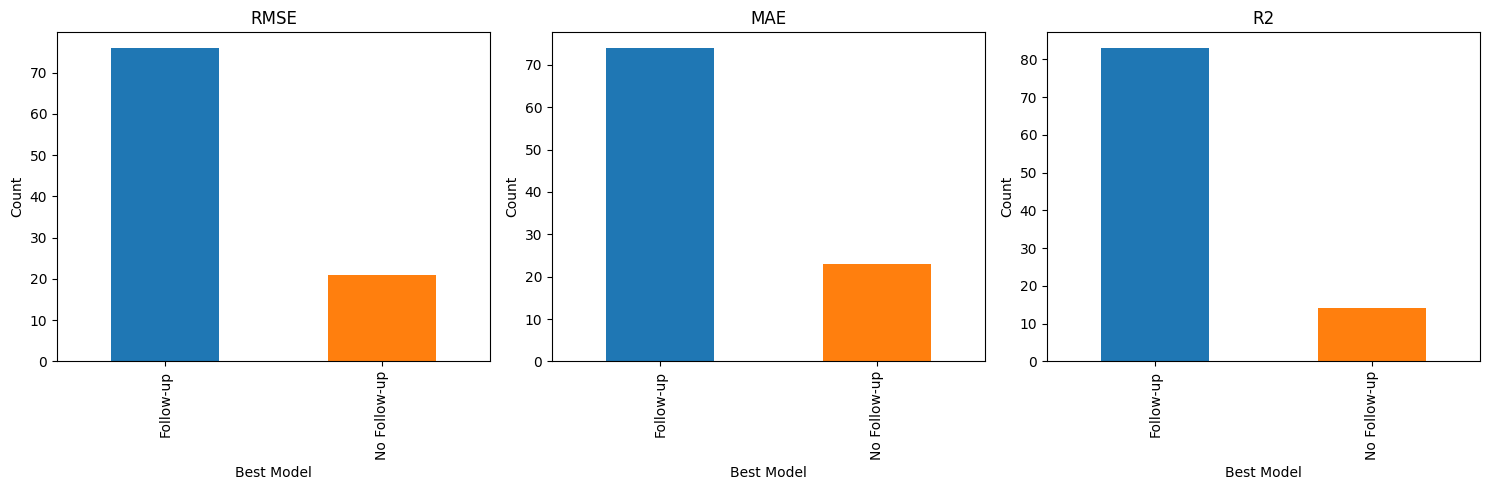

,RMSE,MAE,R2
Follow-up,76,74,83
No Follow-up,21,23,14


In [27]:
# Function to determine which model performs better per lab per metric
def best_model(row):
    best_per_lab = {}
    for metric in ['RMSE', 'MAE', 'R2']:
        xgb_col = f'{metric}_with_follow_up'
        mae_col = f'{metric}_without_follow_up'
        if metric == 'R2':
            best_per_lab[metric] = 'Follow-up' if row[xgb_col] > row[mae_col] else 'No Follow-up'  # Higher R2 is better
        else:
            best_per_lab[metric] = 'Follow-up' if row[xgb_col] < row[mae_col] else 'No Follow-up'  # Lower RMSE/MAE is better
    return best_per_lab

# Create a dictionary with the best model per lab per metric
best_model_dict = df_pivot.apply(best_model, axis=1).to_dict()

# Retrieve the default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot a pie chart to show the distribution of the best models per metric
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(['RMSE', 'MAE', 'R2']):
    best_model_series = pd.Series({k: v[metric] for k, v in best_model_dict.items()})
    
    # Ensure MAE is the second element so it gets the second color (orange by default)
    ordered_series = best_model_series.value_counts().reindex(['Follow-up', 'No Follow-up'])
    
    ordered_series.plot.pie(ax=axs[i], autopct='%1.1f%%', startangle=90, colors=default_colors[:len(ordered_series)], title=metric)
    axs[i].set_ylabel('')

# Plot a bar chart to show the distribution of the best models per metric
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(['RMSE', 'MAE', 'R2']):
    best_model_series = pd.Series({k: v[metric] for k, v in best_model_dict.items()})
    
    # Ensure MAE is the second element so it gets the default orange color
    ordered_series = best_model_series.value_counts().reindex(['Follow-up', 'No Follow-up'])
    
    ordered_series.plot.bar(ax=axs[i], color=default_colors[:len(ordered_series)], title=metric)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Best Model')

plt.tight_layout()
plt.show()

# Plot the bar chart for distribution of the best models per metric as a table for easier comparison
best_model_df = {}
for metric in ['RMSE', 'MAE', 'R2']:
    best_model_series = pd.Series({k: v[metric] for k, v in best_model_dict.items()})
    best_model_df[metric] = best_model_series.value_counts()
    
best_model_df = pd.DataFrame(best_model_df)
best_model_df

<Figure size 1200x600 with 0 Axes>

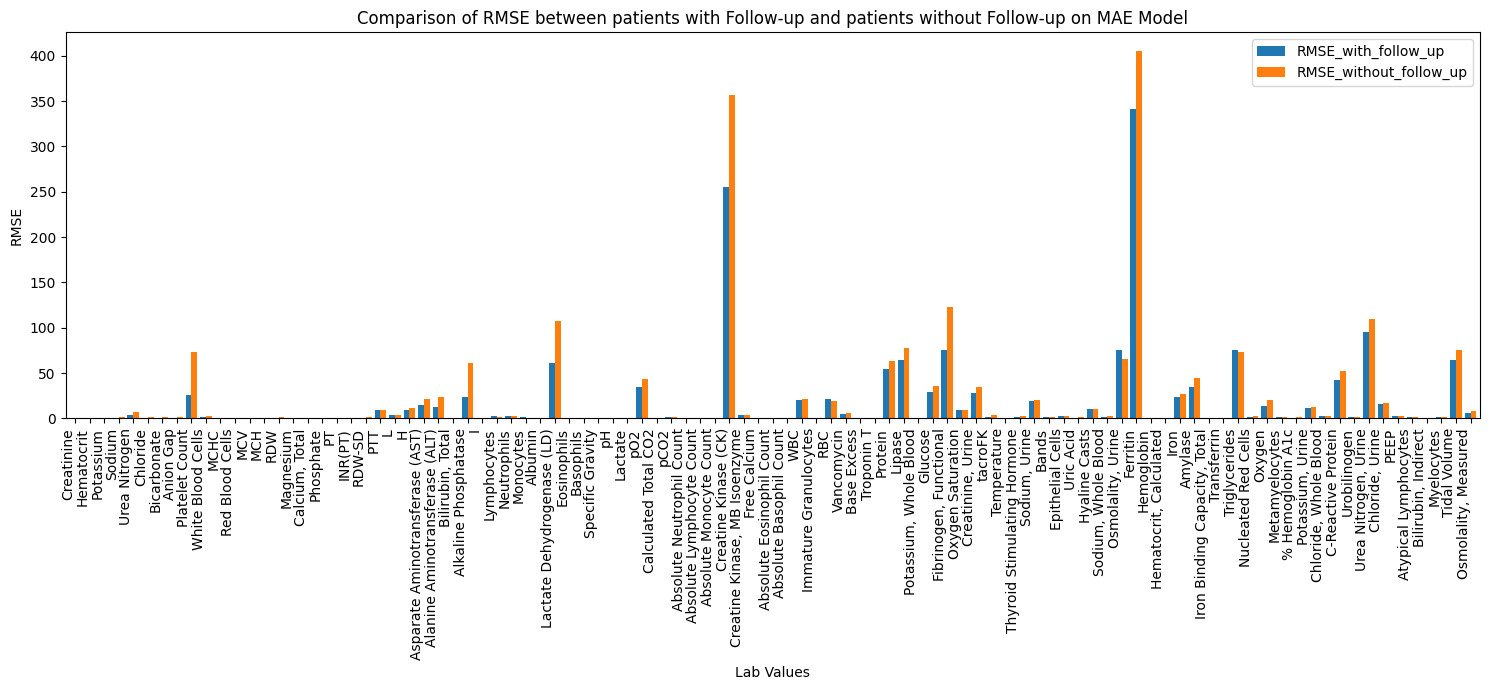

<Figure size 1200x600 with 0 Axes>

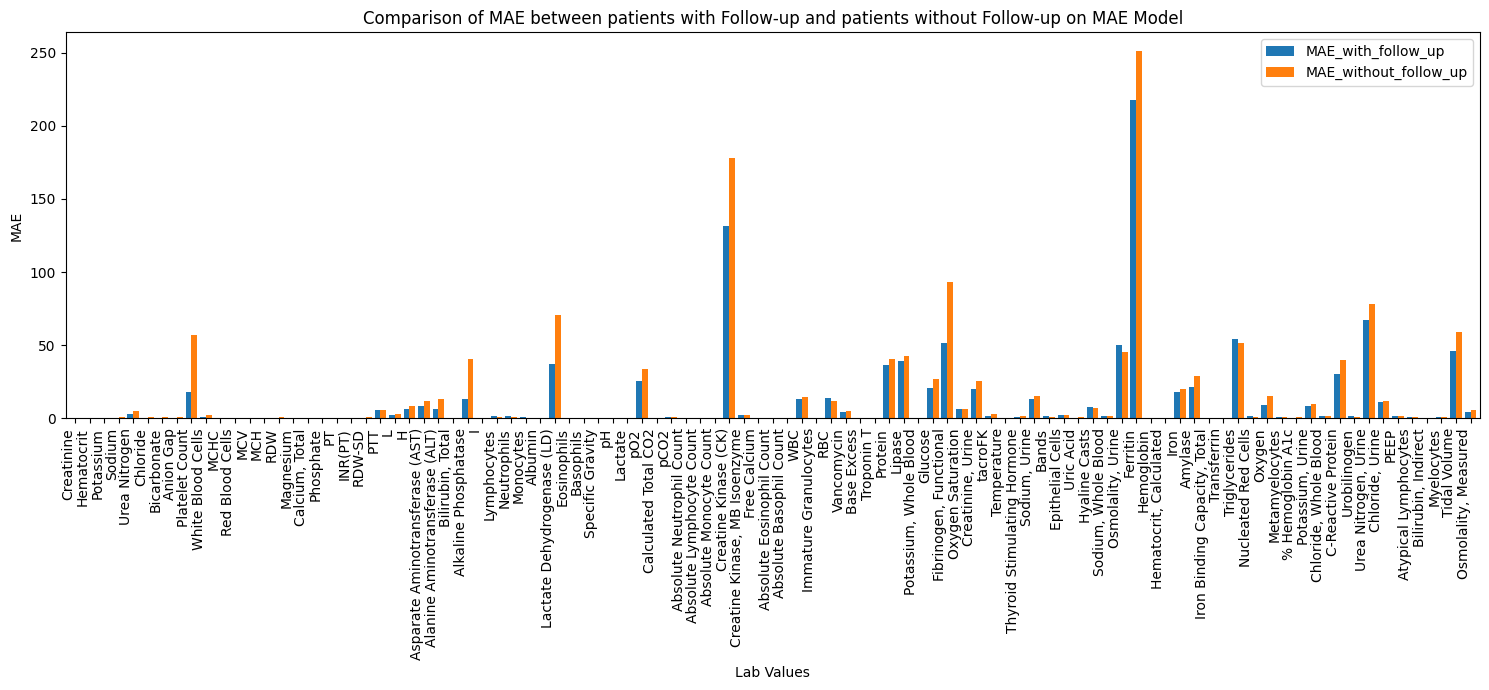

<Figure size 1200x600 with 0 Axes>

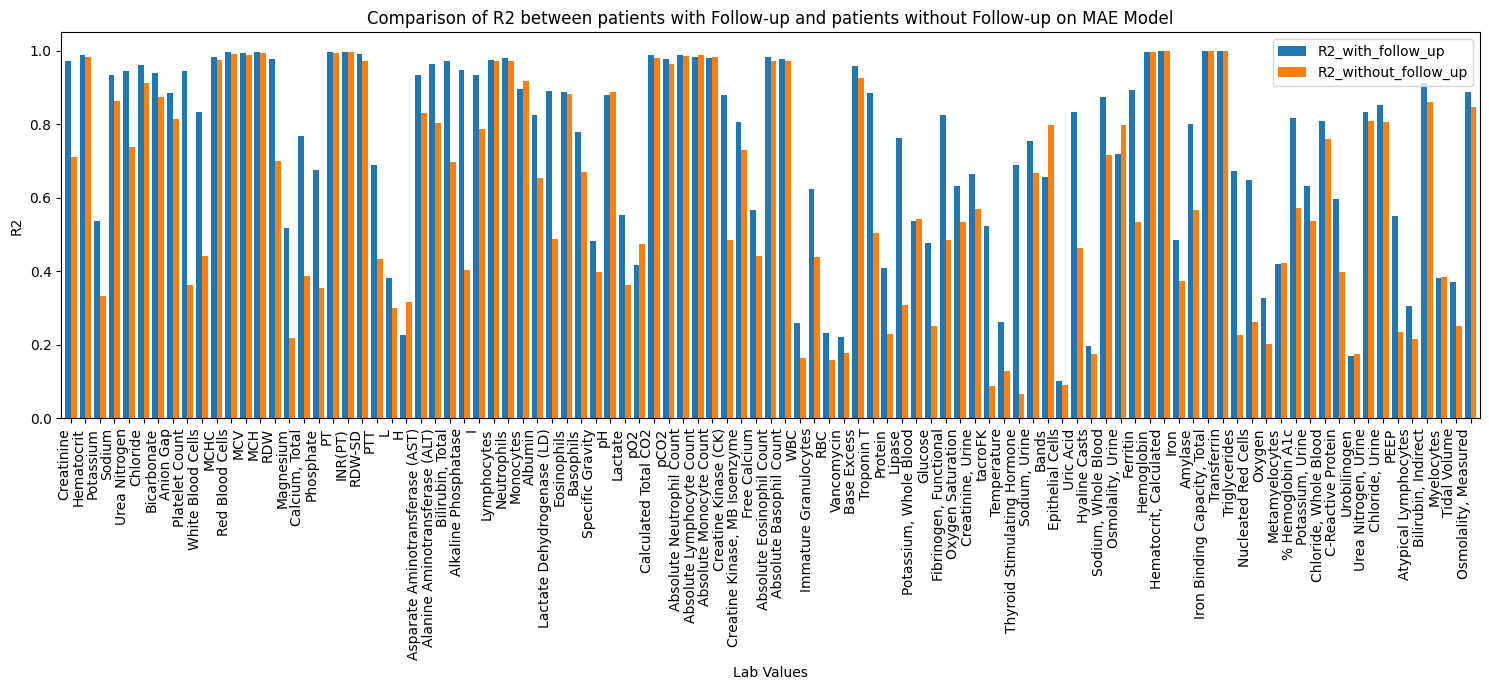

In [28]:
# Plot comparison for all labs
metrics = ['RMSE', 'MAE', 'R2']
df_pivot.reset_index(inplace=True)

for metric in metrics:
    plt.figure(figsize=(12, 6))
    df_pivot.plot(x='Column', y=[f'{metric}_with_follow_up', f'{metric}_without_follow_up'], kind='bar', width=0.8, figsize=(15, 7))
    plt.title(f'Comparison of {metric} between patients with Follow-up and patients without Follow-up on MAE Model')
    plt.ylabel(metric)
    plt.xlabel("Lab Values")
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

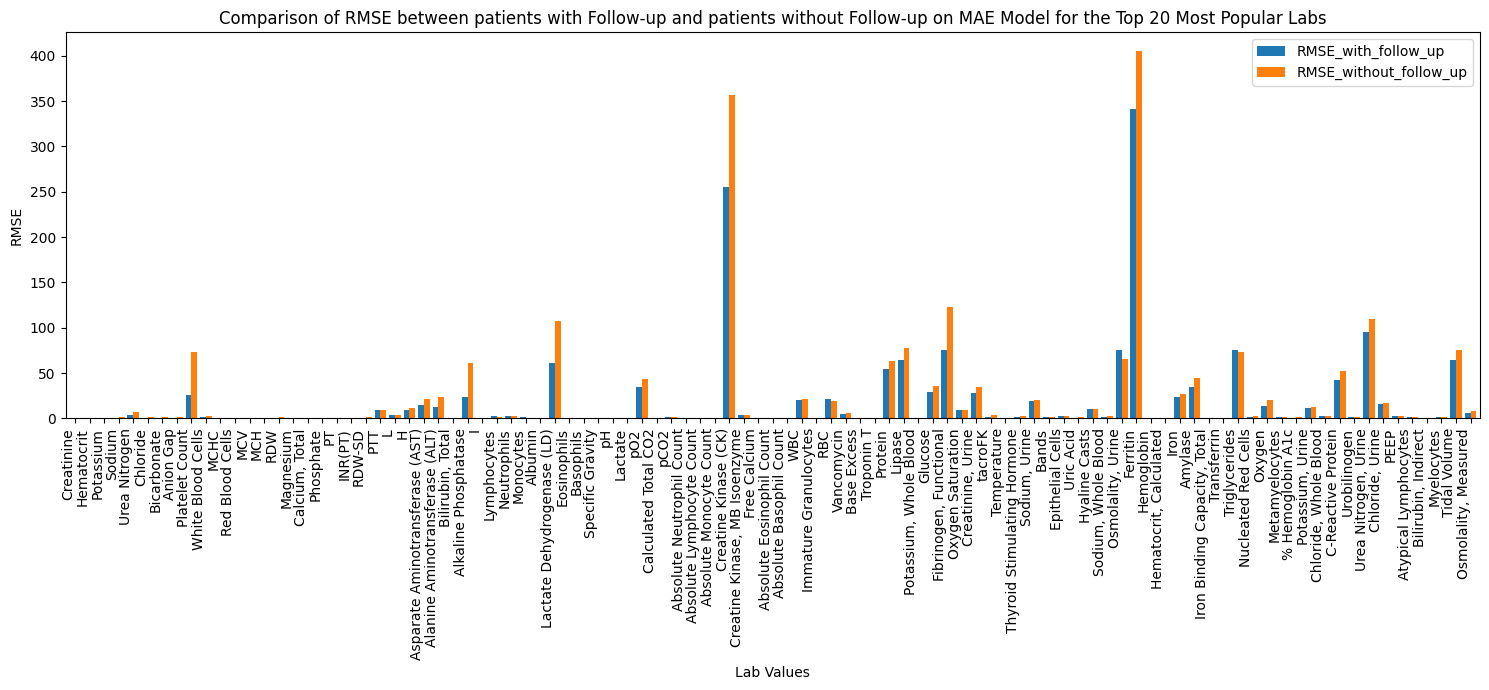

               Column  RMSE_with_follow_up  RMSE_without_follow_up
0          Creatinine             0.166807                0.466813
1          Hematocrit             0.549613                0.675482
2           Potassium             0.311434                0.381470
3              Sodium             0.963716                1.269720
4       Urea Nitrogen             3.952850                7.473268
5            Chloride             0.963401                1.322523
6         Bicarbonate             0.890107                1.183385
7           Anion Gap             0.954846                1.184999
8      Platelet Count            26.318585               73.766563
9   White Blood Cells             1.714790                2.909449
10               MCHC             0.184267                0.226765
11    Red Blood Cells             0.038928                0.059013
12                MCV             0.485379                0.623402
13                MCH             0.148972                0.18

<Figure size 1200x600 with 0 Axes>

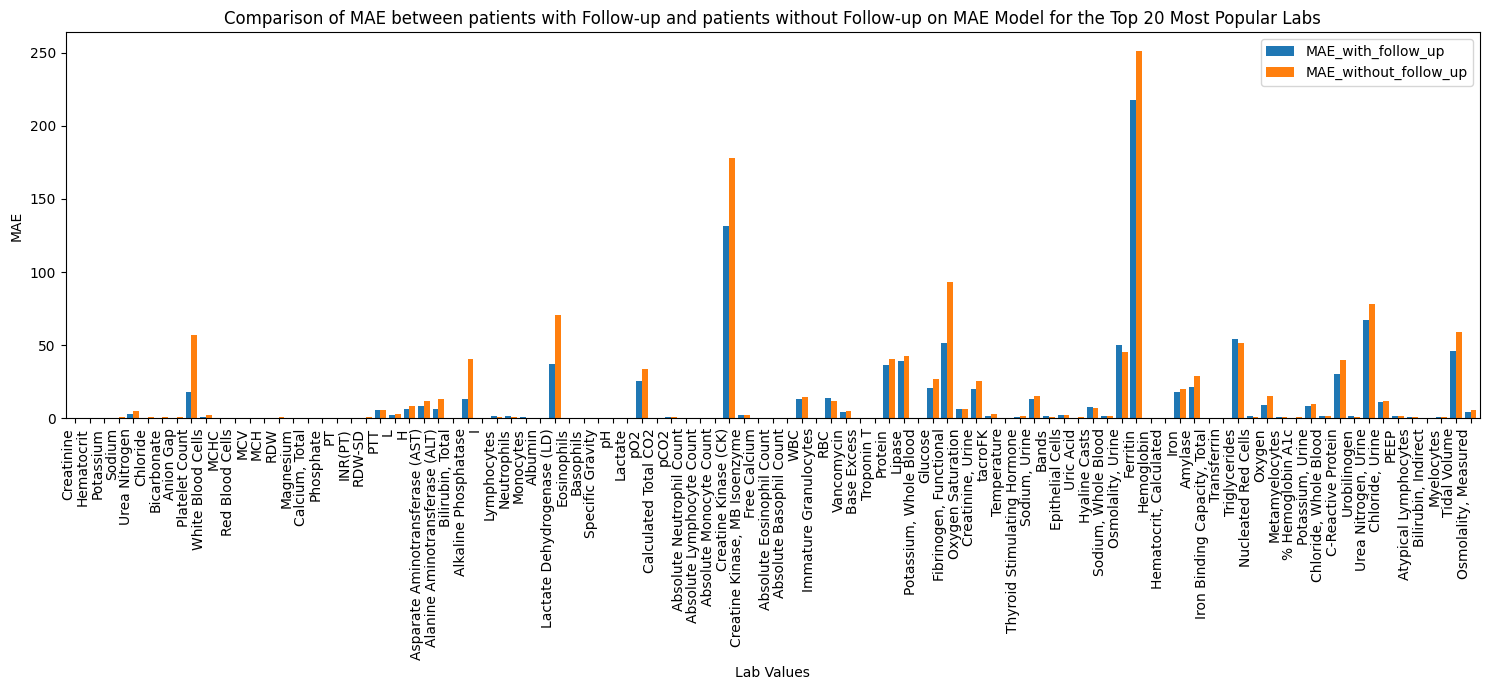

               Column  MAE_with_follow_up  MAE_without_follow_up
0          Creatinine            0.106161               0.284010
1          Hematocrit            0.215361               0.240614
2           Potassium            0.246133               0.307090
3              Sodium            0.639611               0.797172
4       Urea Nitrogen            2.722148               5.323561
5            Chloride            0.646596               0.827696
6         Bicarbonate            0.604456               0.745145
7           Anion Gap            0.652812               0.792384
8      Platelet Count           18.247809              56.959188
9   White Blood Cells            1.197045               2.146351
10               MCHC            0.129344               0.150920
11    Red Blood Cells            0.021378               0.028371
12                MCV            0.338031               0.404164
13                MCH            0.104104               0.125135
14                RDW    

<Figure size 1200x600 with 0 Axes>

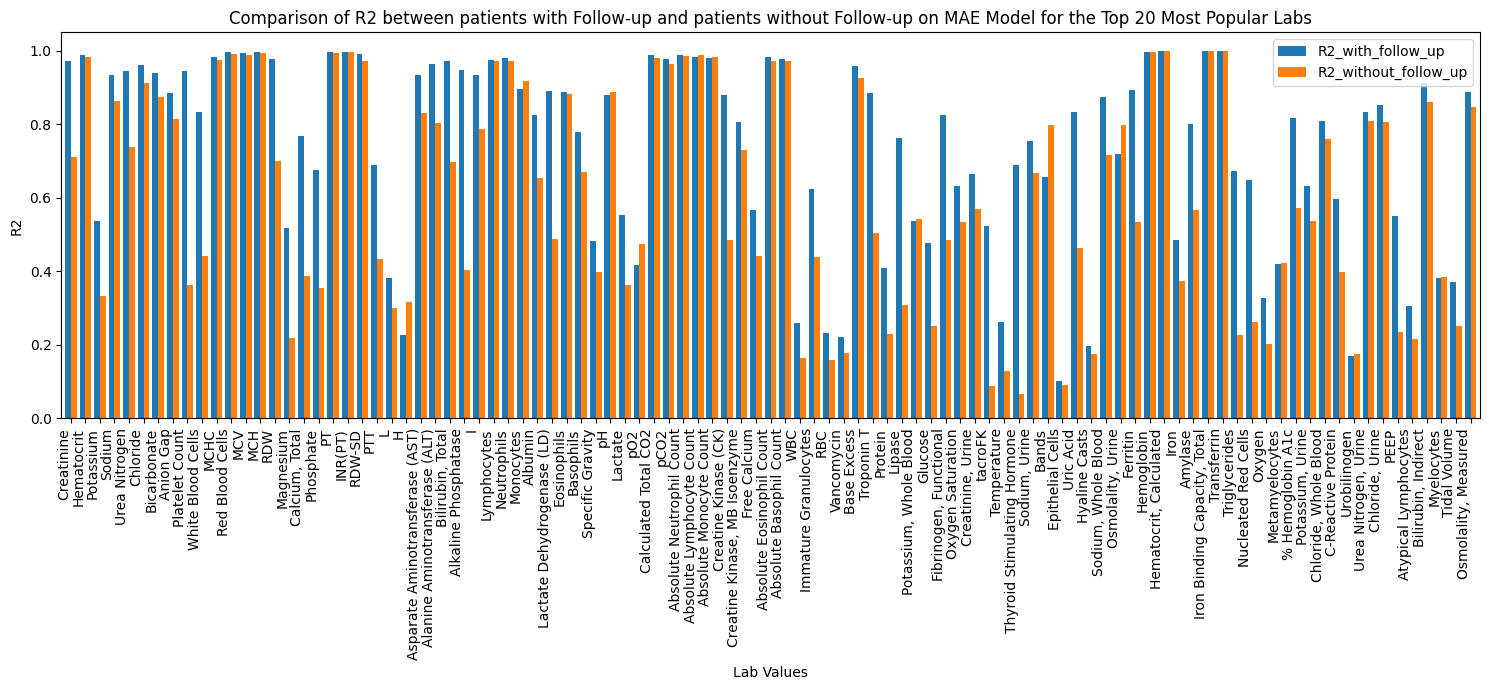

               Column  R2_with_follow_up  R2_without_follow_up
0          Creatinine           0.972196              0.712018
1          Hematocrit           0.989095              0.983732
2           Potassium           0.537547              0.333261
3              Sodium           0.933972              0.864098
4       Urea Nitrogen           0.946166              0.737409
5            Chloride           0.960738              0.913468
6         Bicarbonate           0.938569              0.874885
7           Anion Gap           0.886252              0.814743
8      Platelet Count           0.945693              0.362920
9   White Blood Cells           0.832424              0.441899
10               MCHC           0.984211              0.975212
11    Red Blood Cells           0.996301              0.991404
12                MCV           0.993890              0.989480
13                MCH           0.995960              0.993470
14                RDW           0.978670              0

In [29]:
# Plot comparison for the top 20 most popular labs
metrics = ['RMSE', 'MAE', 'R2']

for metric in metrics:
    plt.figure(figsize=(12, 6))
    df_pivot.plot(x='Column', y=[f'{metric}_with_follow_up', f'{metric}_without_follow_up'], kind='bar', width=0.8, figsize=(15, 7))
    plt.title(f'Comparison of {metric} between patients with Follow-up and patients without Follow-up on MAE Model for the Top 20 Most Popular Labs')
    plt.ylabel(metric)
    plt.xlabel("Lab Values")
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Show a table with the comparison
    print(df_pivot[:20][['Column', f'{metric}_with_follow_up', f'{metric}_without_follow_up']])

### Overall Analysis for MAE model

In [30]:
# Calculate mean values for each model
mean_performance = followup_df[followup_df.Model == 'MAE'].groupby('Follow-Up').mean()
mean_performance

/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_91142/2610295627.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_performance = followup_df[followup_df.Model == 'MAE'].groupby('Follow-Up').mean()


,RMSE,MAE,R2,Err,itemid
Follow-Up,,,,,
with_follow_up,16.587838,10.284506,0.766086,0.0,51115.78
without_follow_up,20.224736,13.006076,0.654373,0.0,51115.78


In [31]:
# Calculate mean values for each MAE
mean_performance = followup_df[followup_df.Model == 'MAE'].groupby('Follow-Up').std()
mean_performance

/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_91142/4158831132.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_performance = followup_df[followup_df.Model == 'MAE'].groupby('Follow-Up').std()


,RMSE,MAE,R2,Err,itemid
Follow-Up,,,,,
with_follow_up,45.679877,25.815793,0.235830,0.0,327.686706
without_follow_up,53.932693,31.715490,0.283053,0.0,327.686706


### Overall Analysis for XGBoost model

In [32]:
# Calculate mean values for each model
mean_performance = followup_df[followup_df.Model == 'XGB'].groupby('Follow-Up').mean()
mean_performance

/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_91142/2419259758.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_performance = followup_df[followup_df.Model == 'XGB'].groupby('Follow-Up').mean()


,RMSE,MAE,R2,Err,itemid
Follow-Up,,,,,
with_follow_up,16.794461,10.815500,0.739101,0.0,51115.78
without_follow_up,21.454711,13.966914,0.608873,0.0,51115.78


In [33]:
# Calculate mean values for each MAE
mean_performance = followup_df[followup_df.Model == 'XGB'].groupby('Follow-Up').std()
mean_performance

/var/folders/4w/k6c16td51cv9ytcmnnvx3mpw0000gn/T/ipykernel_91142/2447897144.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_performance = followup_df[followup_df.Model == 'XGB'].groupby('Follow-Up').std()


,RMSE,MAE,R2,Err,itemid
Follow-Up,,,,,
with_follow_up,45.673326,27.939562,0.254189,0.0,327.686706
without_follow_up,58.016181,34.714554,0.297165,0.0,327.686706


### Potassium analysis

In [38]:
# Analyze Potassium '50971'
# Split per race ('first_race') and check the number of instances where the lab value is not missing
df_test['npval_50971'].notna().groupby(df_test['first_race']).sum()

first_race
Asian        2776
Black       14859
Hispanic     4588
Others       9854
White       58003
Name: npval_50971, dtype: int64

In [42]:
# Check the number of follow-up instances for Potassium per race
def follow_up_count(df, lab_id):
    npval_col = f'npval_{lab_id}'
    npval_last_col = f'npval_last_{lab_id}'
    
    # Split per race
    for race in df.first_race.unique():
        print(f'Race: {race}')
        
        df_aux = df[df.first_race == race]
    
        Total = df_aux[[npval_col]].dropna().shape[0]
        Follow_up = df_aux[[npval_col, npval_last_col]].dropna().shape[0]
        
        print(f'Total: {Total}, Follow-up: {Follow_up}, Non-Follow-up: {Total - Follow_up}, Proportion: {Follow_up / Total:.2f}')
    
follow_up_count(df_test, 50971)


Race: White
Total: 58003, Follow-up: 45724, Non-Follow-up: 12279, Proportion: 0.79
Race: Black
Total: 14859, Follow-up: 11508, Non-Follow-up: 3351, Proportion: 0.77
Race: Hispanic
Total: 4588, Follow-up: 3507, Non-Follow-up: 1081, Proportion: 0.76
Race: Others
Total: 9854, Follow-up: 8065, Non-Follow-up: 1789, Proportion: 0.82
Race: Asian
Total: 2776, Follow-up: 2204, Non-Follow-up: 572, Proportion: 0.79
